# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [9]:
#load the dataset
import sqlite3

conn = sqlite3.connect('database.sqlite')


# Fetch table names
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(tables_query).fetchall()
print("Available tables:", [table[0] for table in tables])

# Describe each table
for table in tables:
    print(f"\nSchema of {table[0]}:")
    schema_query = f"PRAGMA table_info({table[0]});"
    schema = conn.execute(schema_query).fetchall()
    for col in schema:
        print(f"Column: {col[1]}, Type: {col[2]}")

conn.close()



Available tables: ['sqlite_sequence', 'Player_Attributes', 'Player', 'Match', 'League', 'Country', 'Team', 'Team_Attributes']

Schema of sqlite_sequence:
Column: name, Type: 
Column: seq, Type: 

Schema of Player_Attributes:
Column: id, Type: INTEGER
Column: player_fifa_api_id, Type: INTEGER
Column: player_api_id, Type: INTEGER
Column: date, Type: TEXT
Column: overall_rating, Type: INTEGER
Column: potential, Type: INTEGER
Column: preferred_foot, Type: TEXT
Column: attacking_work_rate, Type: TEXT
Column: defensive_work_rate, Type: TEXT
Column: crossing, Type: INTEGER
Column: finishing, Type: INTEGER
Column: heading_accuracy, Type: INTEGER
Column: short_passing, Type: INTEGER
Column: volleys, Type: INTEGER
Column: dribbling, Type: INTEGER
Column: curve, Type: INTEGER
Column: free_kick_accuracy, Type: INTEGER
Column: long_passing, Type: INTEGER
Column: ball_control, Type: INTEGER
Column: acceleration, Type: INTEGER
Column: sprint_speed, Type: INTEGER
Column: agility, Type: INTEGER
Column:

In [10]:
# Query to get the size (rows and columns) of each table
conn = sqlite3.connect('database.sqlite')

tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(tables_query).fetchall()

# Get structure of each table
for table in tables:
    table_name = table[0]
    query_row_count = f"SELECT COUNT(*) FROM {table_name};"
    query_col_count = f"PRAGMA table_info({table_name});"

    # Get row count
    row_count = conn.execute(query_row_count).fetchone()[0]
    # Get column count
    columns = conn.execute(query_col_count).fetchall()
    col_count = len(columns)

    print(f"Table: {table_name}, Rows: {row_count}, Columns: {col_count}")

conn.close()



Table: sqlite_sequence, Rows: 7, Columns: 2
Table: Player_Attributes, Rows: 183978, Columns: 42
Table: Player, Rows: 11060, Columns: 7
Table: Match, Rows: 25979, Columns: 115
Table: League, Rows: 11, Columns: 3
Table: Country, Rows: 11, Columns: 2
Table: Team, Rows: 299, Columns: 5
Table: Team_Attributes, Rows: 1458, Columns: 25


In [11]:
# 4. Missing values and duplicates
# Query to get the number of missing values and duplicates in each table
import pandas as pd
conn = sqlite3.connect('database.sqlite')

# Define tables to check
tables_to_check = ["Player_Attributes", "Player", "Match", "Team_Attributes"]

# Loop through tables
for table in tables_to_check:
    # Load table into a DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)
    print(f"\nTable: {table}")

    # Missing values
    missing_values = df.isnull().sum()
    print("Missing values per column:")
    print(missing_values[missing_values > 0])  # Only show columns with missing values

    # Duplicate rows
    duplicate_rows = df.duplicated().sum()
    print("Number of duplicate rows:", duplicate_rows)

conn.close()


Table: Player_Attributes
Missing values per column:
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle         2713
gk_diving              


Visualizing Table: Player_Attributes


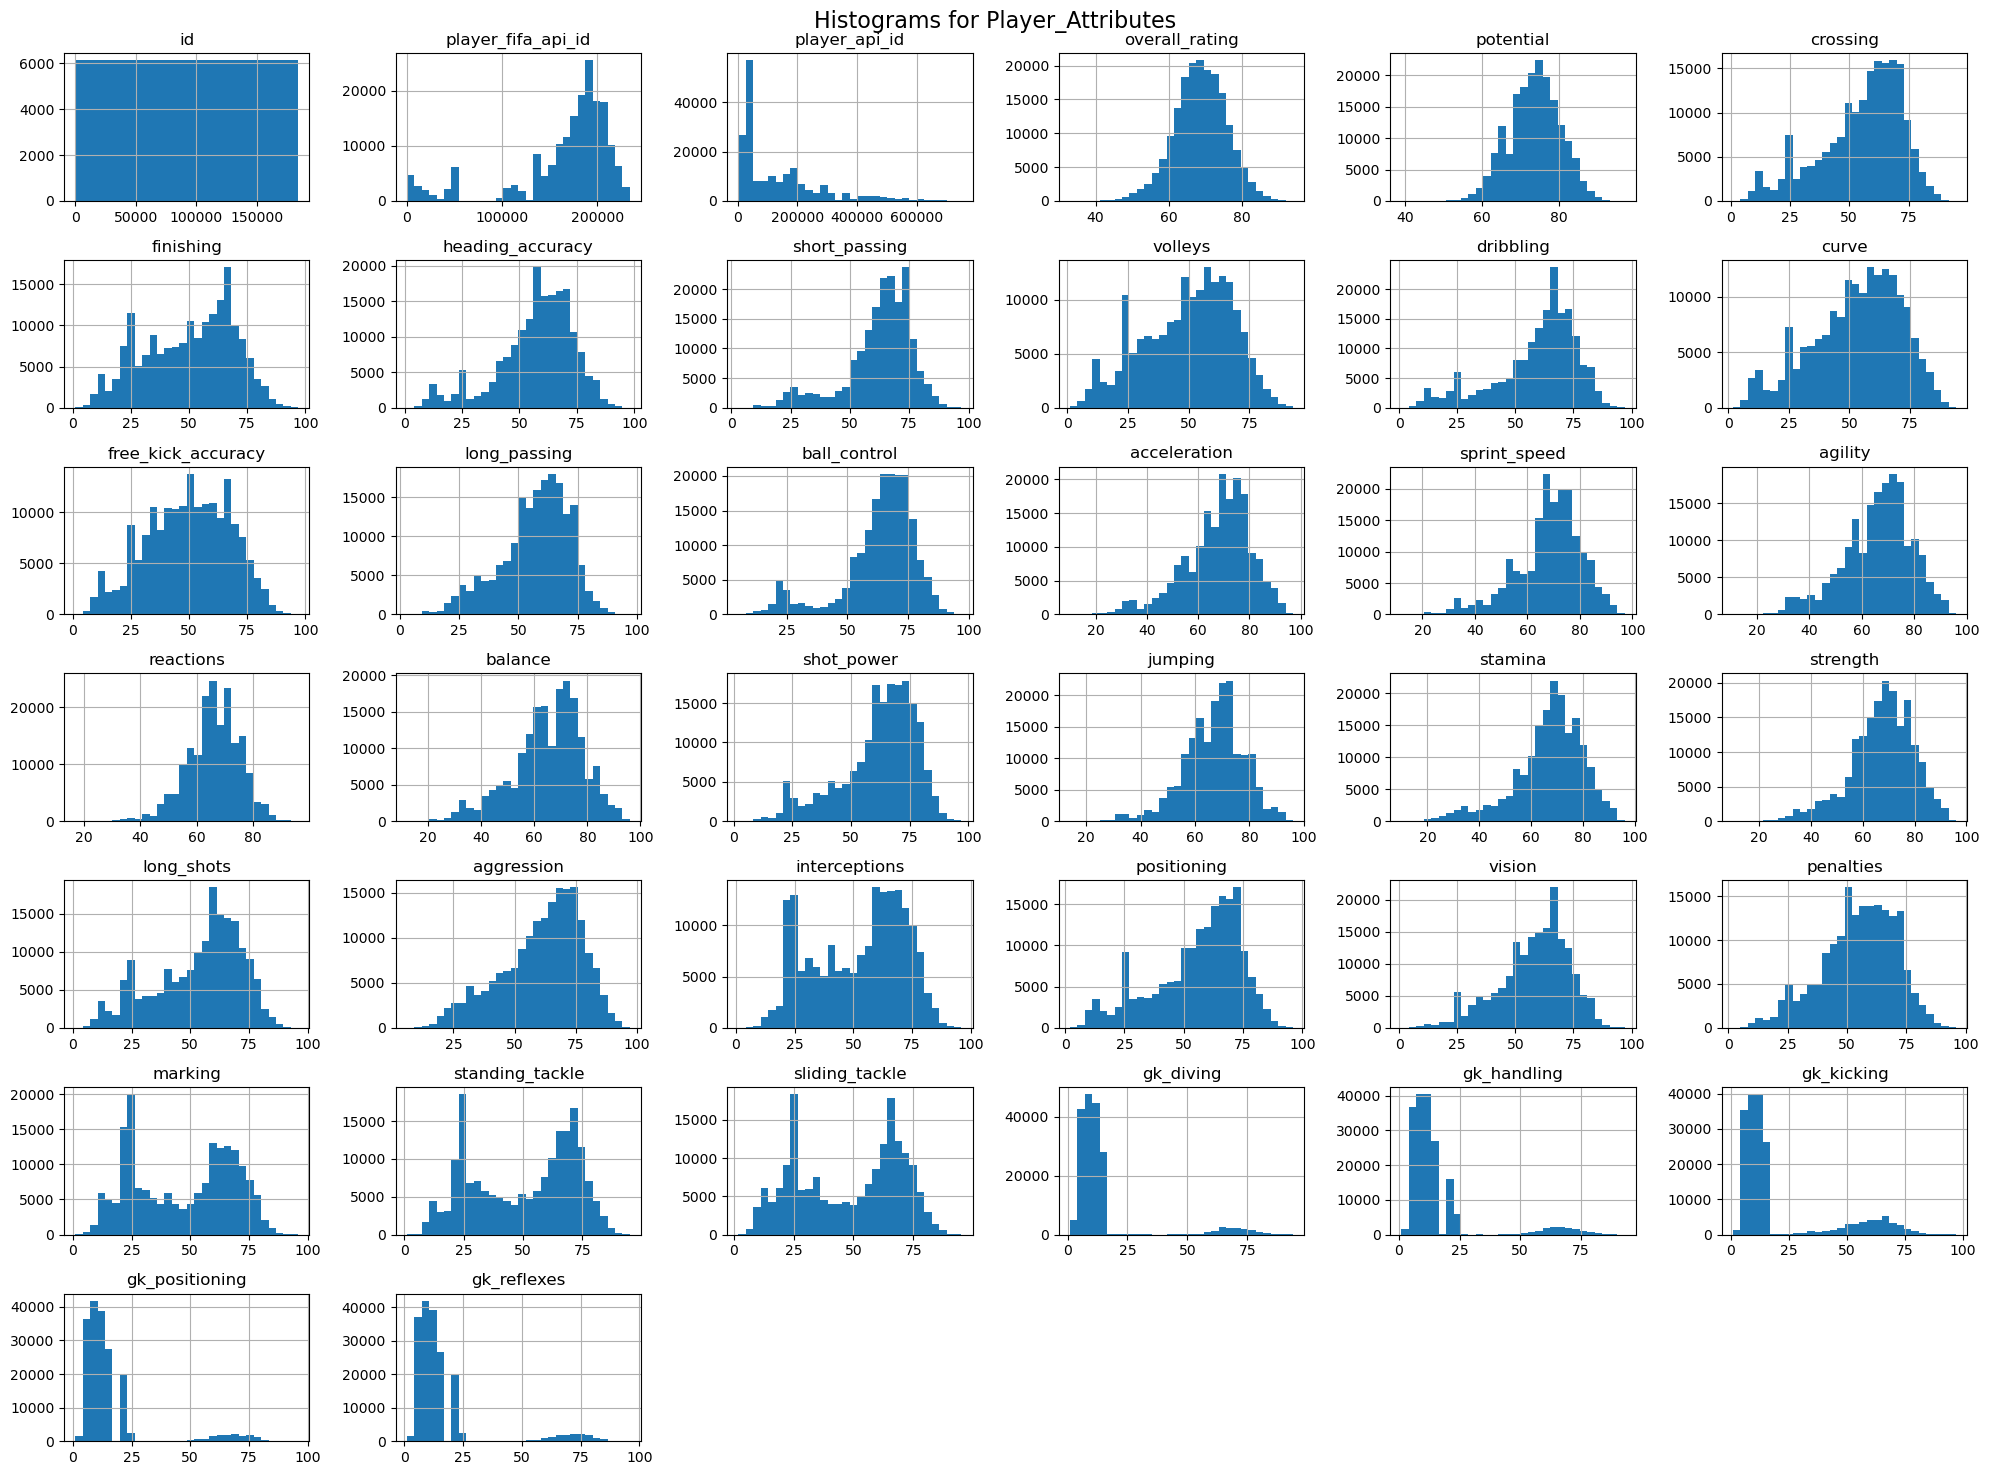

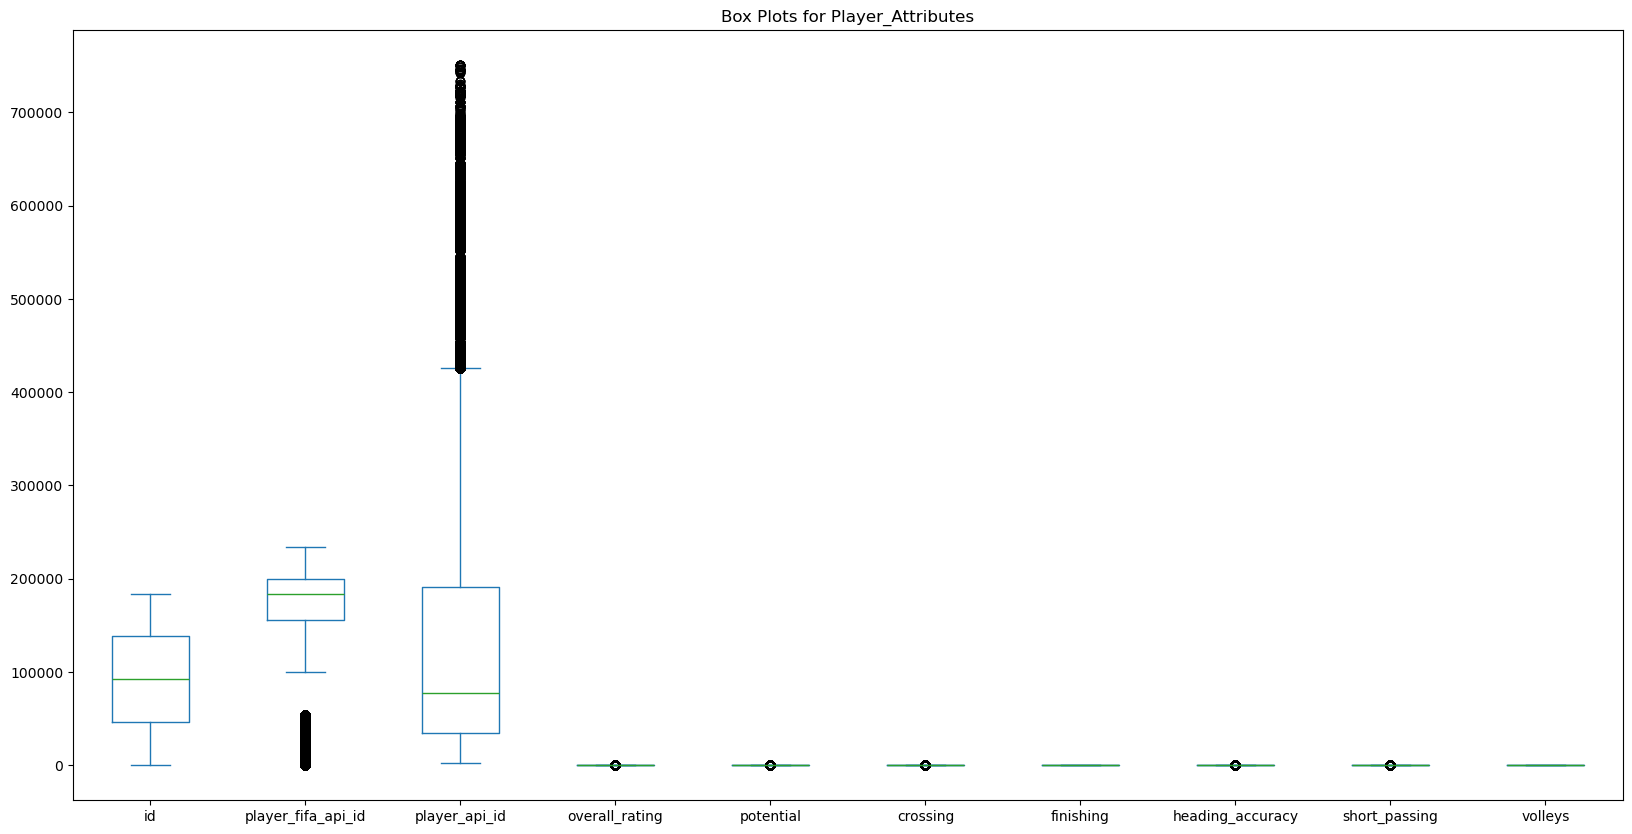


Visualizing Table: Player


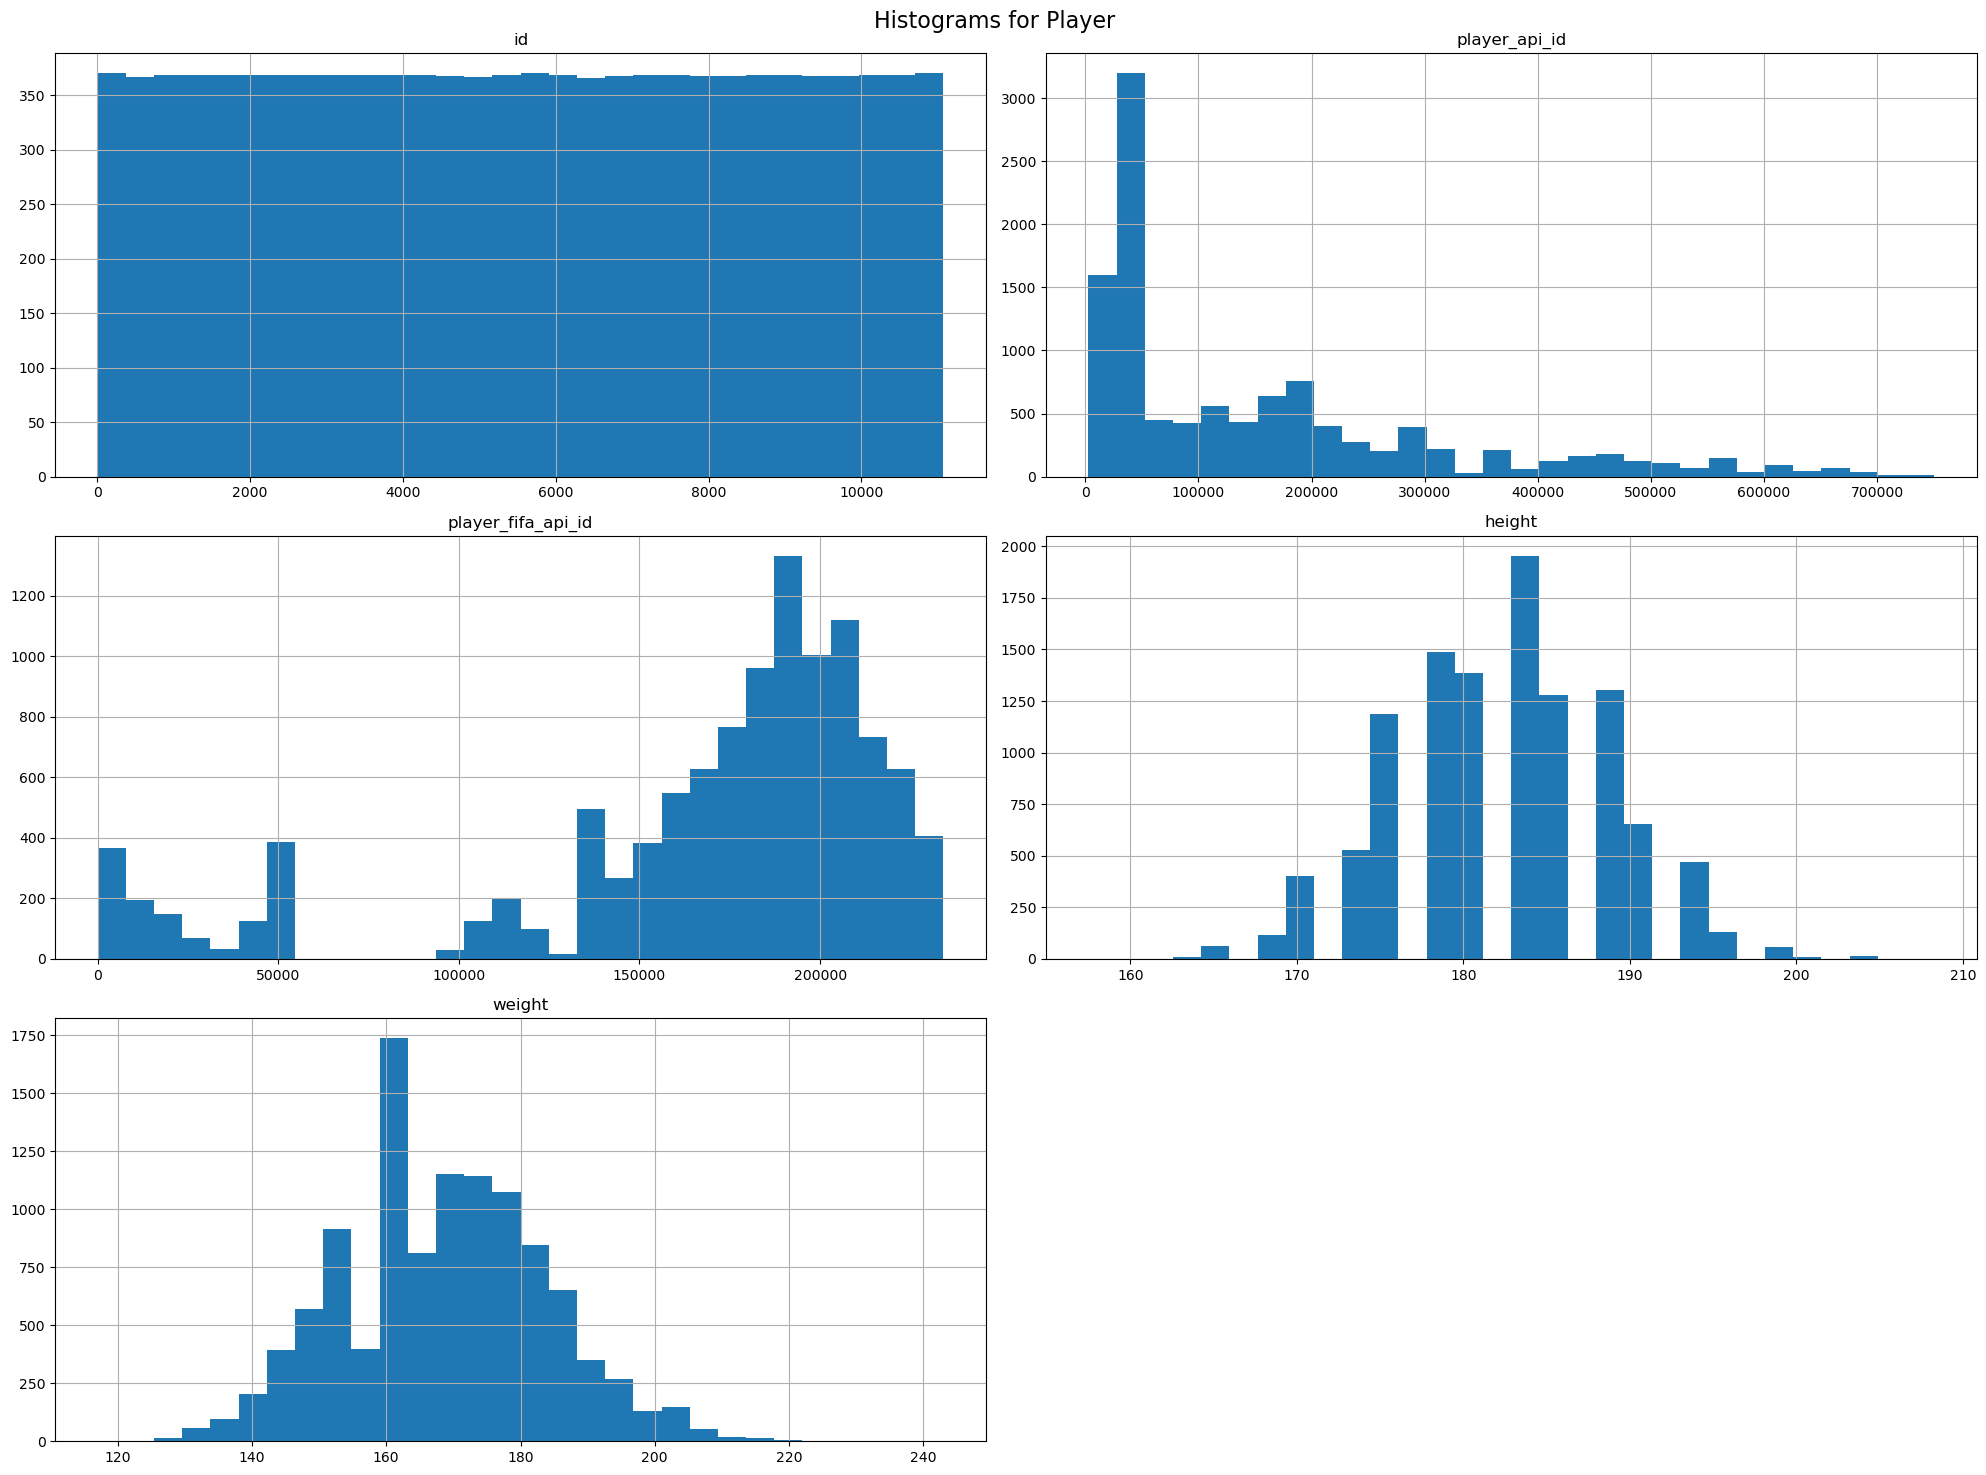

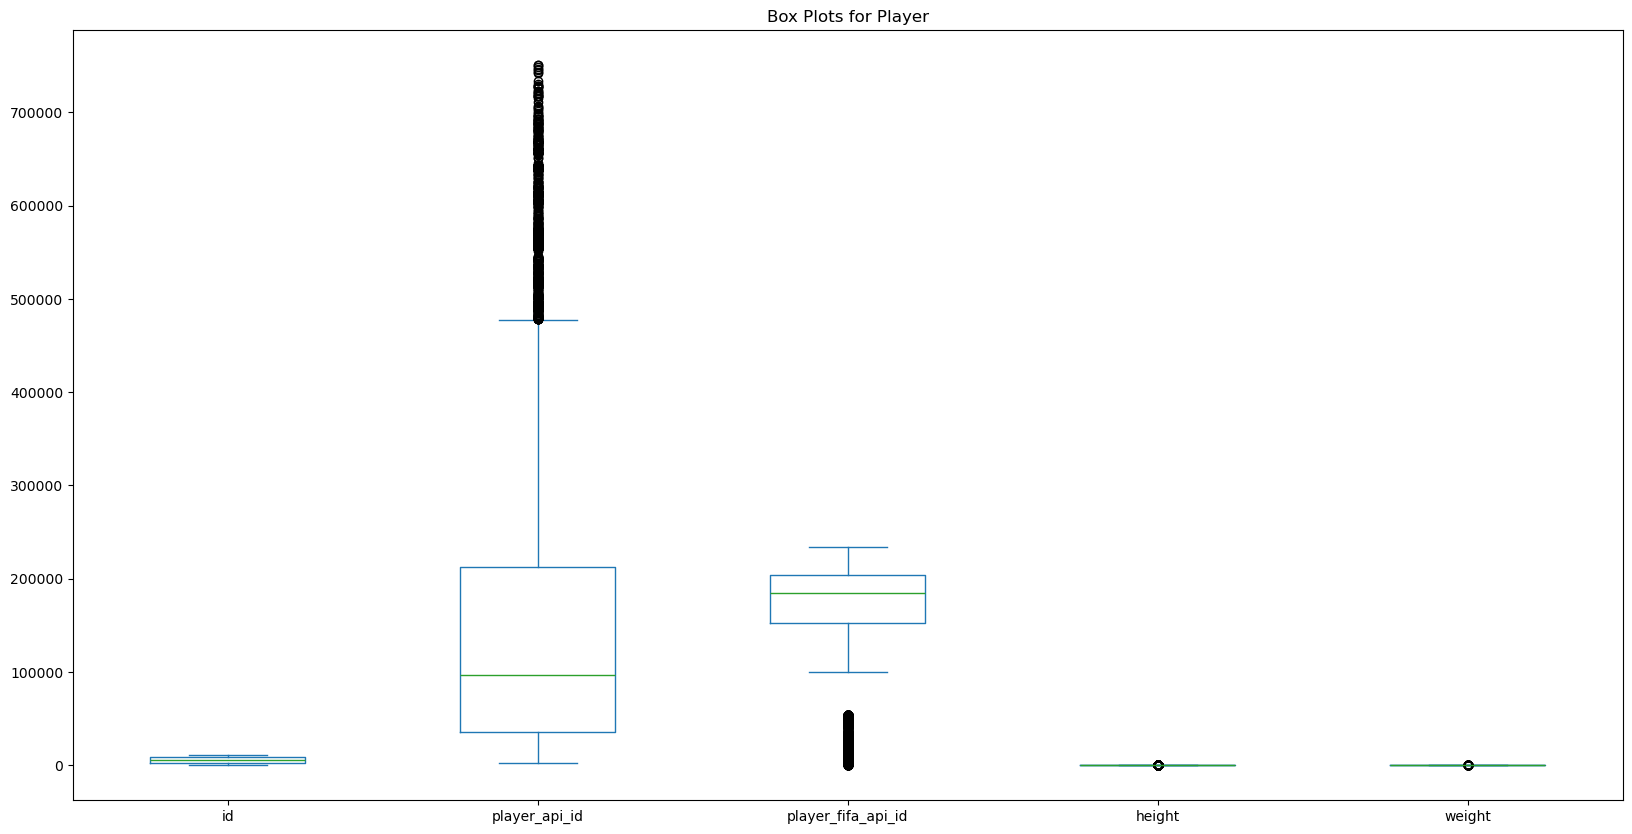


Visualizing Table: Match


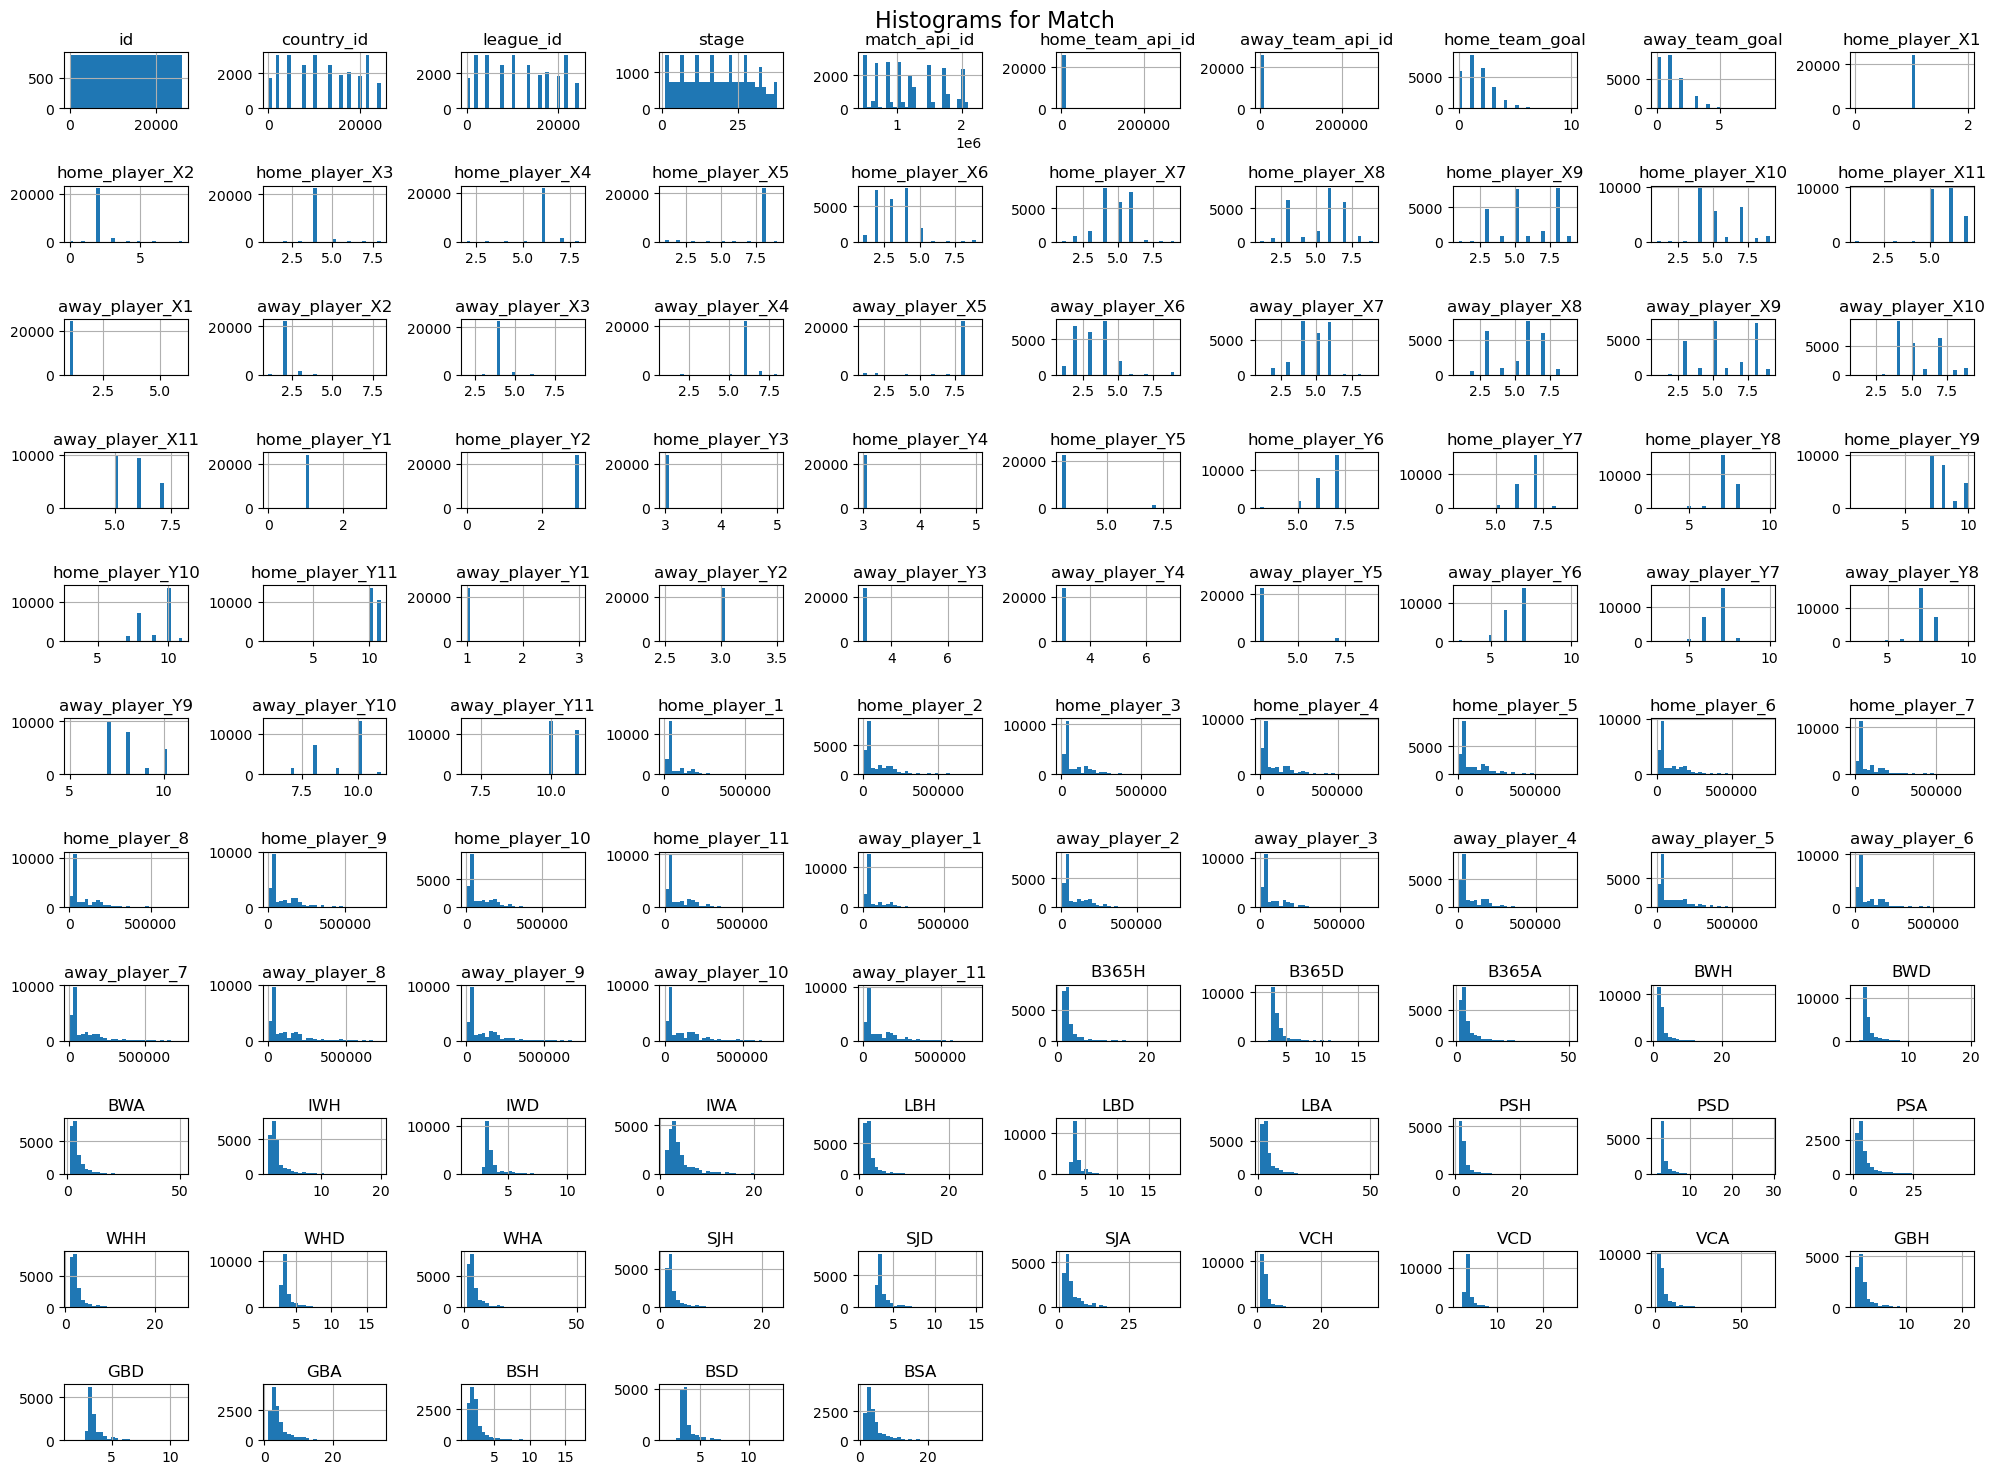

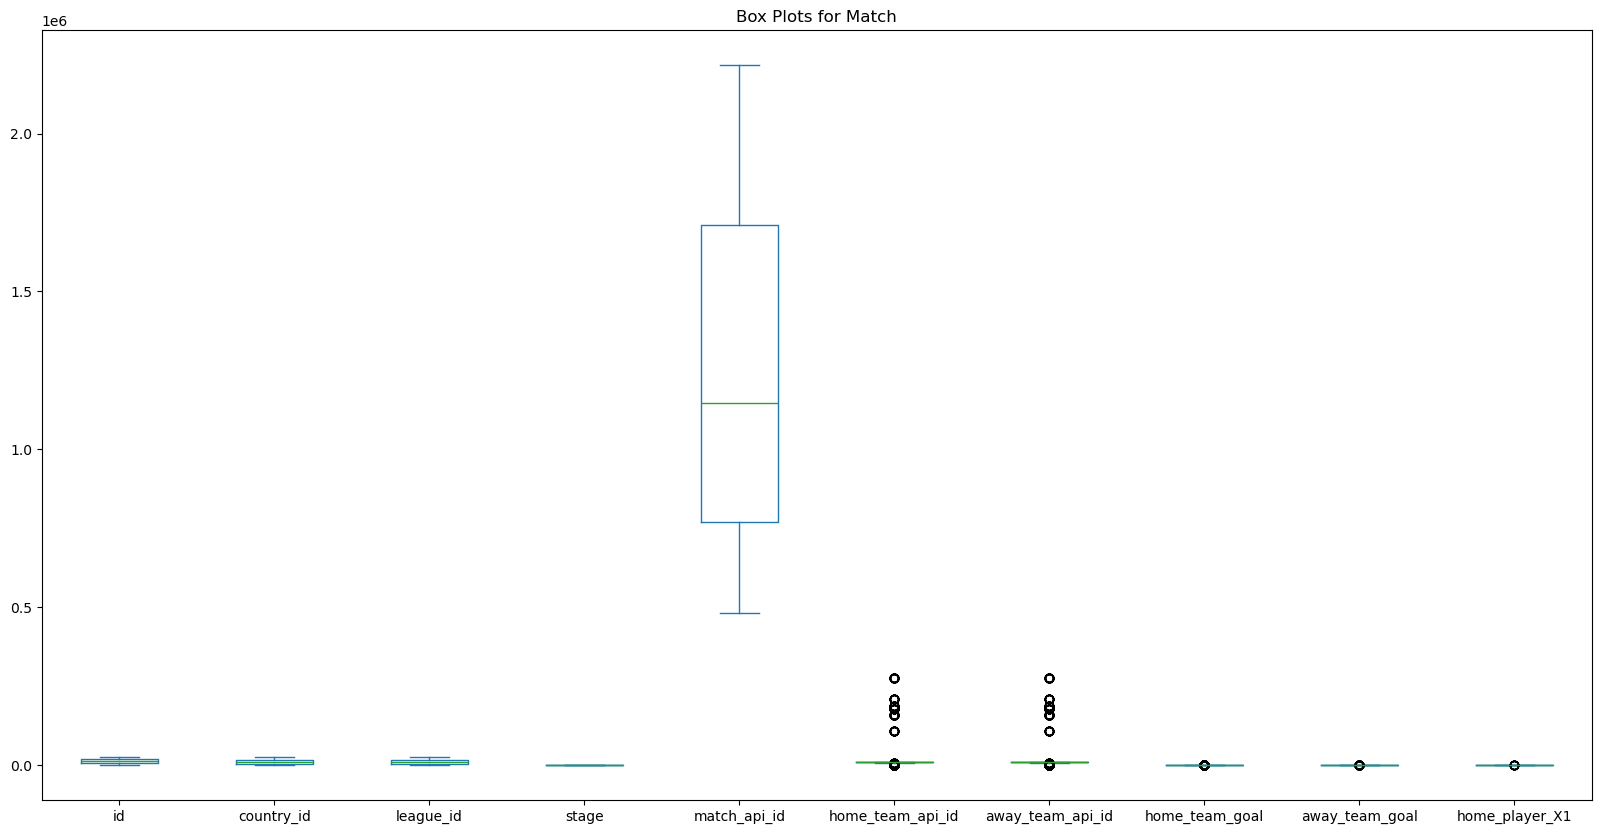


Visualizing Table: Team_Attributes


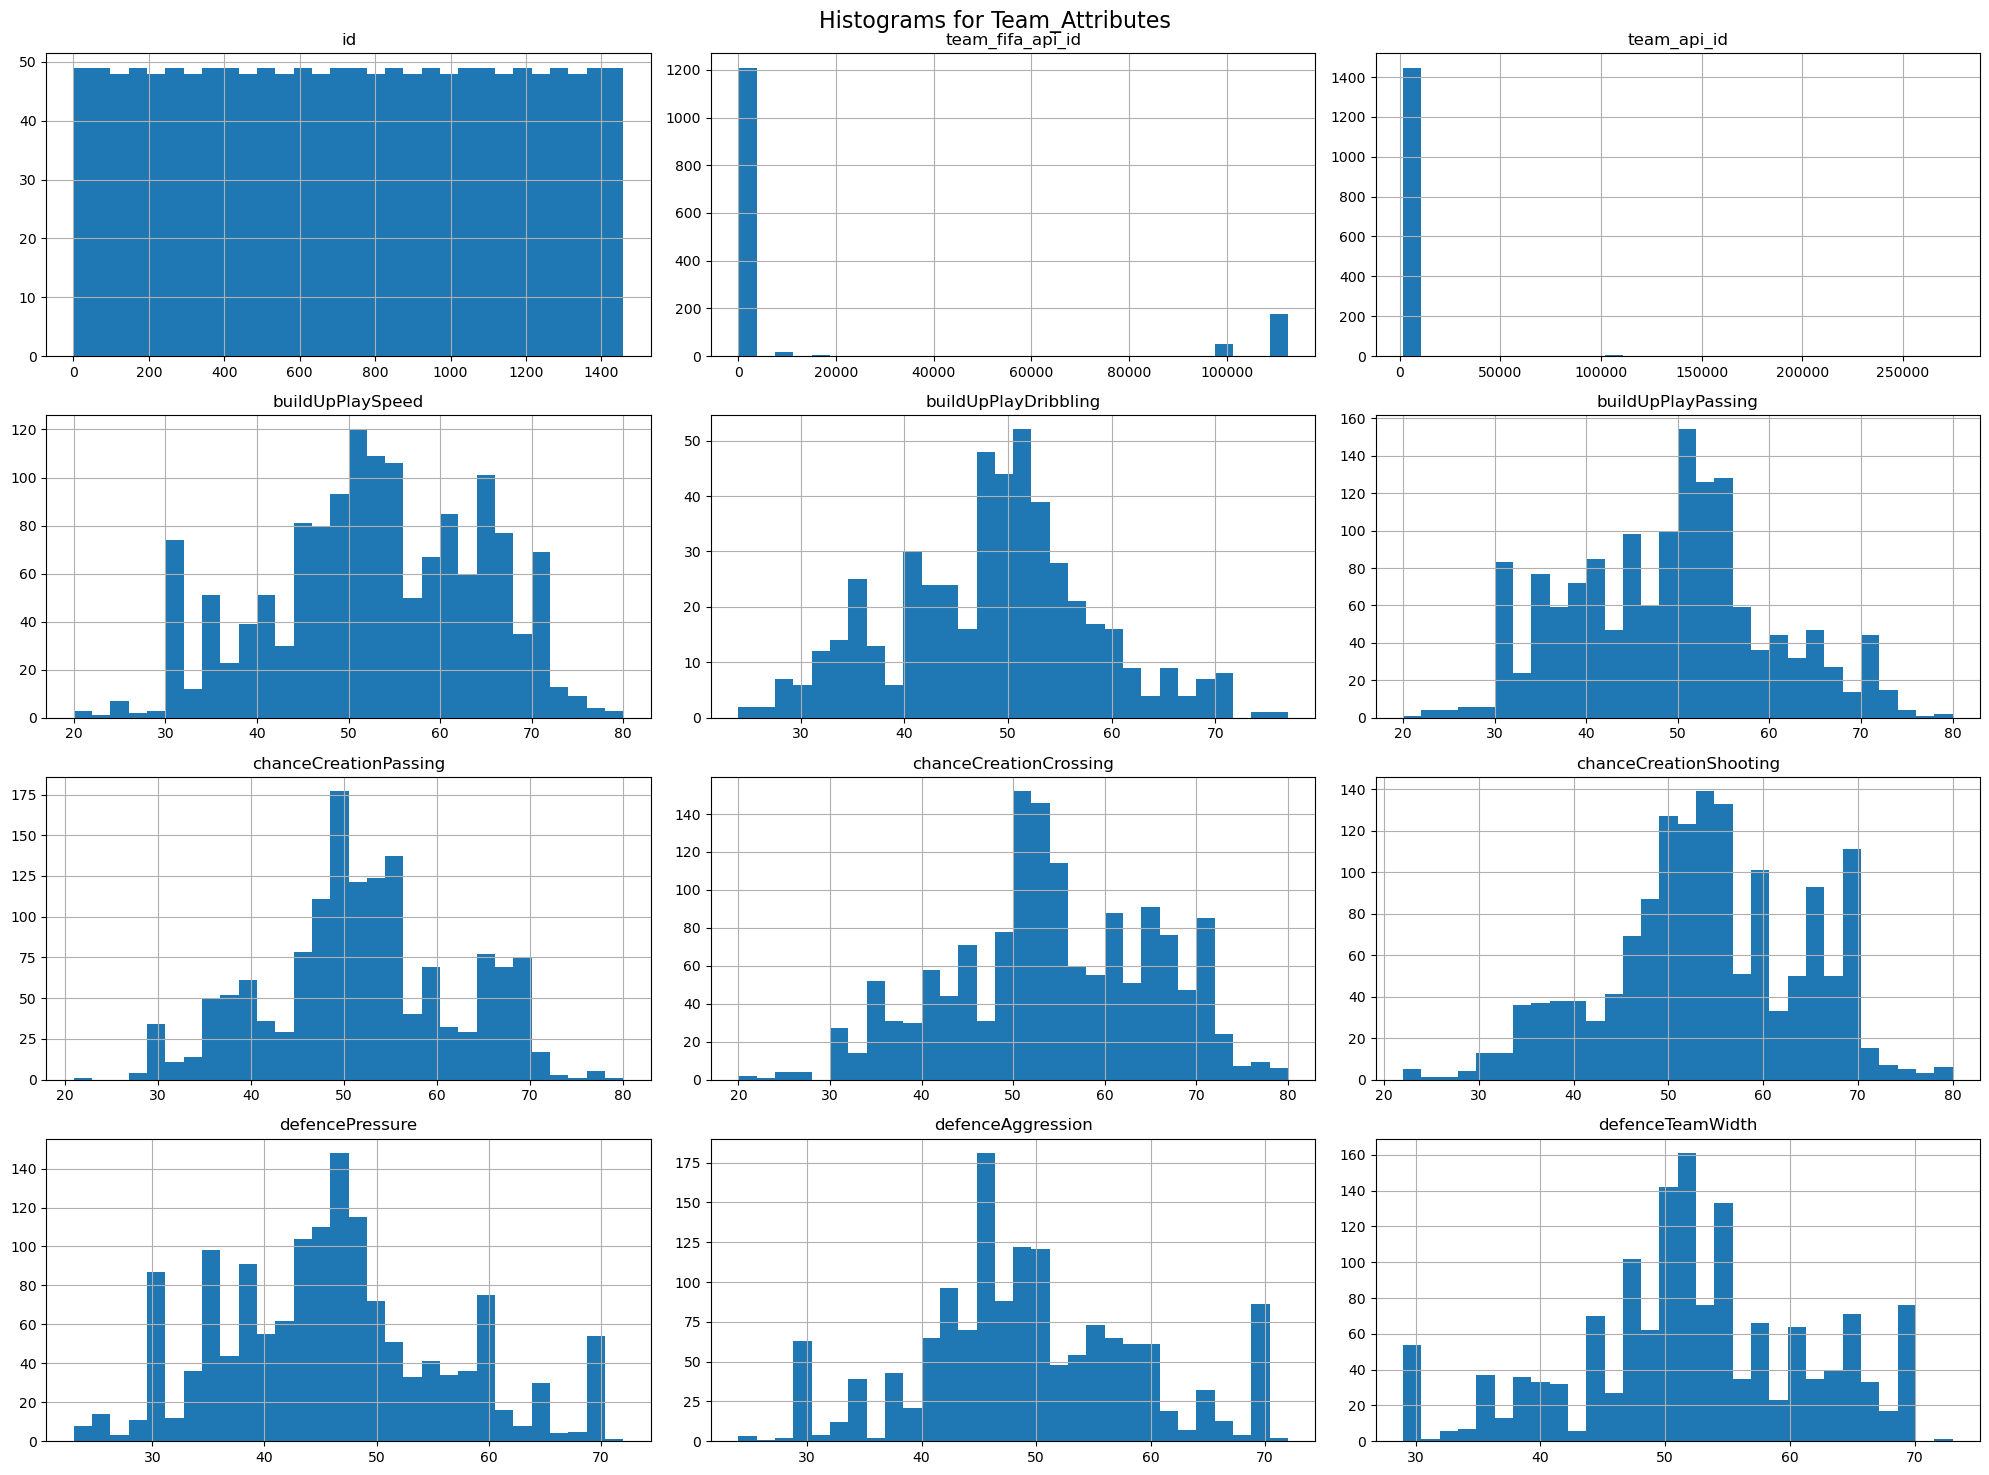

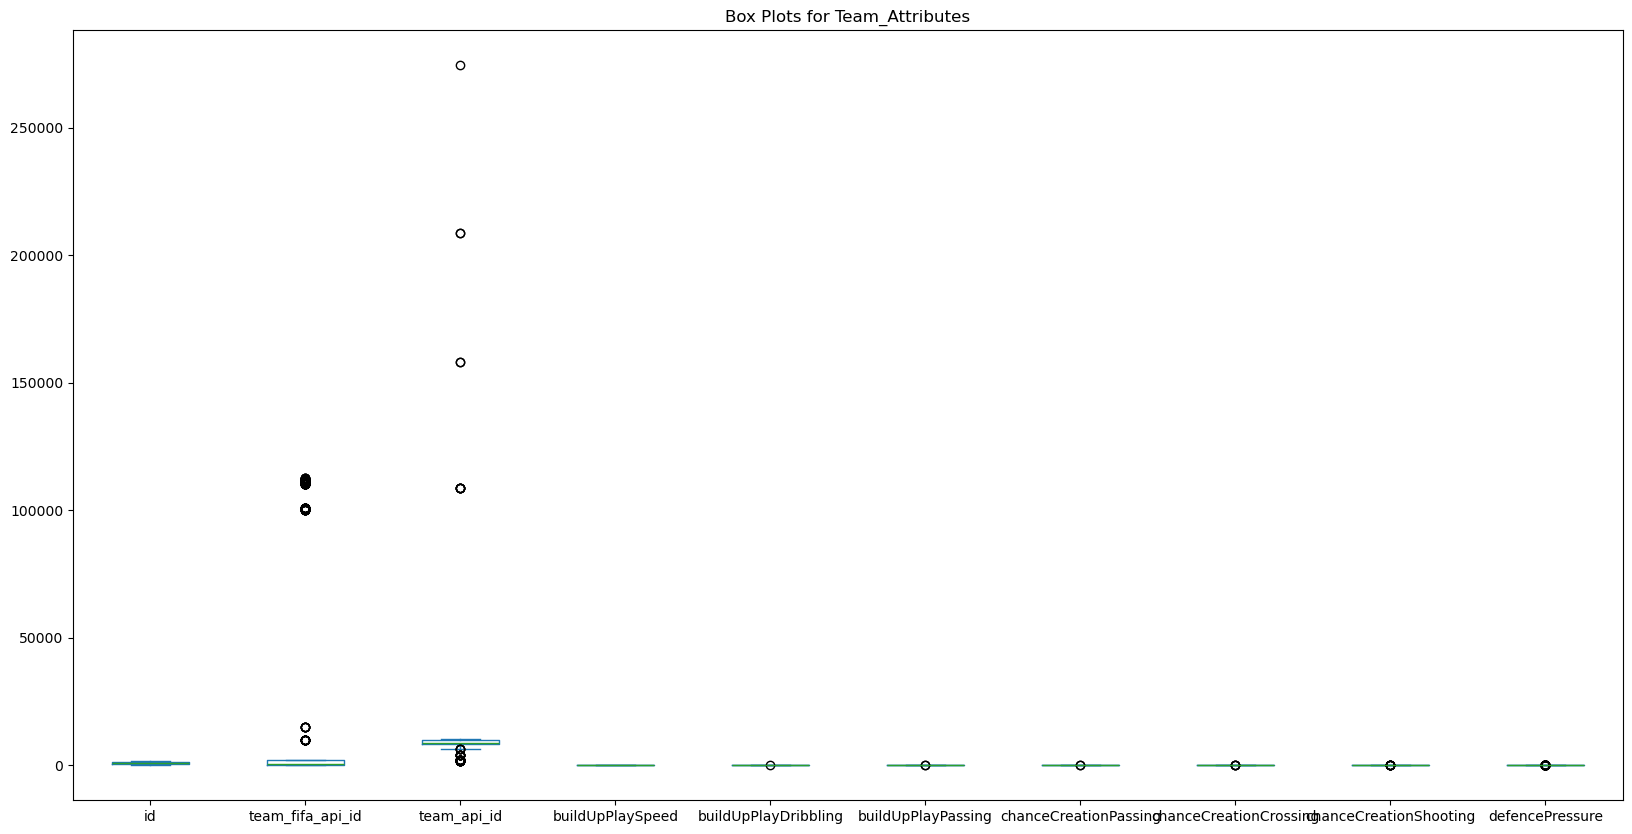

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('database.sqlite')

# Define tables to visualize
tables_to_visualize = ["Player_Attributes","Player", "Match", "Team_Attributes"]

# Visualize each table
for table in tables_to_visualize:
    # Load table into a DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)

    # Select numerical columns
    numerical_df = df.select_dtypes(include=["number"])

    print(f"\nVisualizing Table: {table}")

    # Plot histograms for numerical columns
    numerical_df.hist(bins=30, figsize=(20, 15))
    plt.suptitle(f"Histograms for {table}", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Box plot for the first 10 numerical columns (to avoid overcrowding)
    cols_to_plot = numerical_df.columns[:10]  # Adjust as needed
    numerical_df[cols_to_plot].plot(kind="box", figsize=(20, 10), title=f"Box Plots for {table}")
    plt.show()

conn.close()


In [15]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('database.sqlite')

# Define tables to compute statistics
tables_to_summarize = ["Player_Attributes", "Player", "Match", "Team_Attributes"]

# Compute statistics for each table
for table in tables_to_summarize:
    # Load table into a DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)

    # Select numerical columns
    numerical_df = df.select_dtypes(include=["number"])

    print(f"\nStatistical Summary for Table: {table}")
    print(numerical_df.describe().T)  # Transposed for better readability

conn.close()



Statistical Summary for Table: Player_Attributes
                       count           mean            std     min        25%  \
id                  183978.0   91989.500000   53110.018250     1.0   45995.25   
player_fifa_api_id  183978.0  165671.524291   53851.094769     2.0  155798.00   
player_api_id       183978.0  135900.617324  136927.840510  2625.0   34763.00   
overall_rating      183142.0      68.600015       7.041139    33.0      64.00   
potential           183142.0      73.460353       6.592271    39.0      69.00   
crossing            183142.0      55.086883      17.242135     1.0      45.00   
finishing           183142.0      49.921078      19.038705     1.0      34.00   
heading_accuracy    183142.0      57.266023      16.488905     1.0      49.00   
short_passing       183142.0      62.429672      14.194068     3.0      57.00   
volleys             181265.0      49.468436      18.256618     1.0      35.00   
dribbling           183142.0      59.175154      17.744688 


Visualizing Table: Player_Attributes


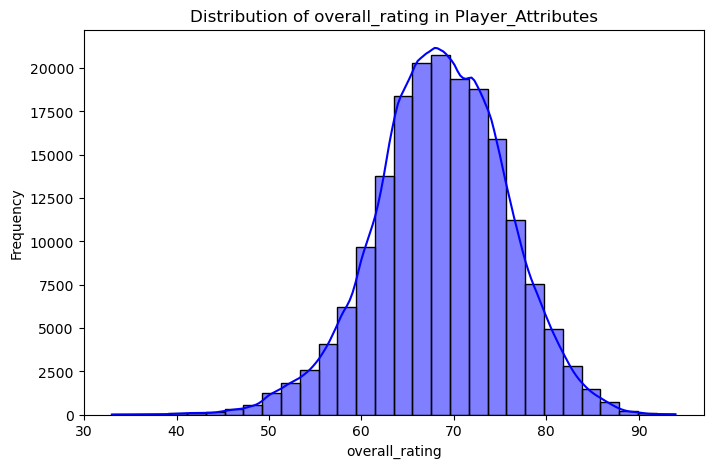

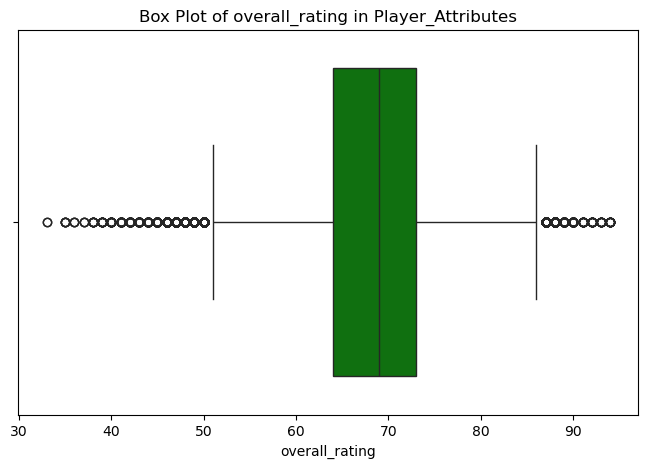

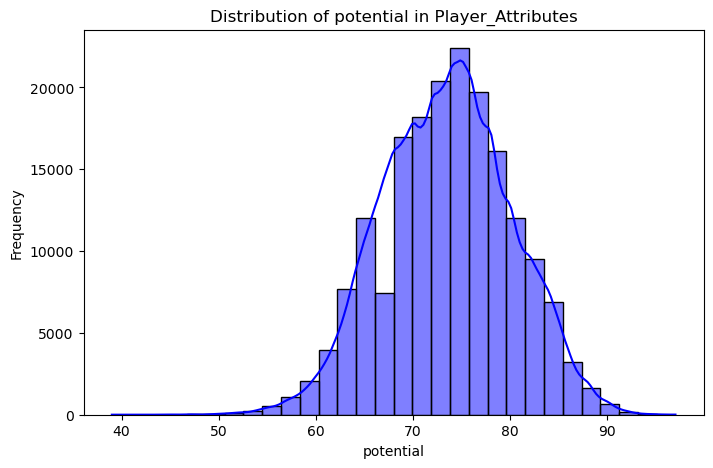

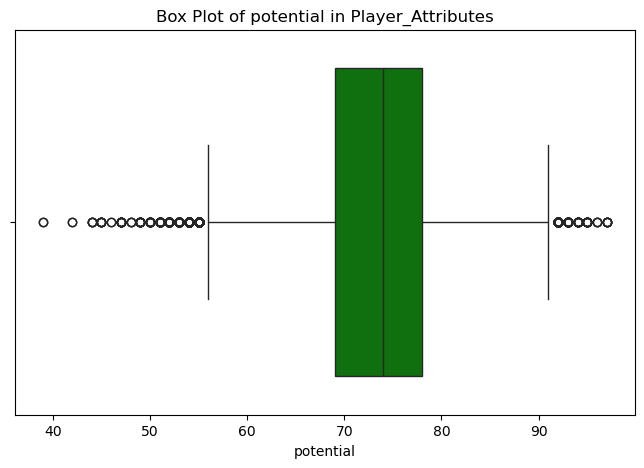

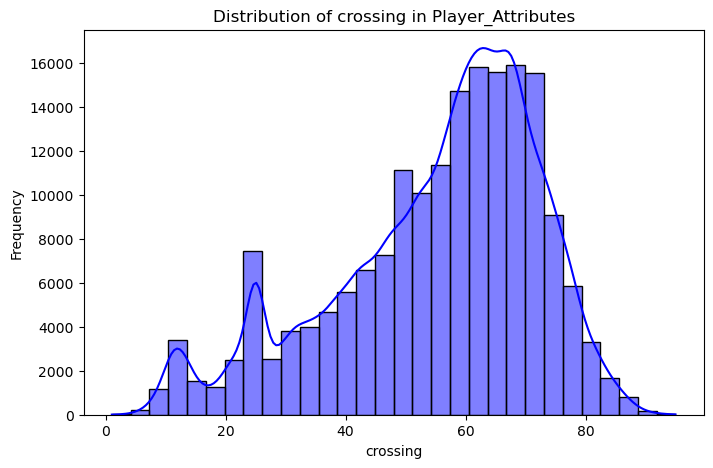

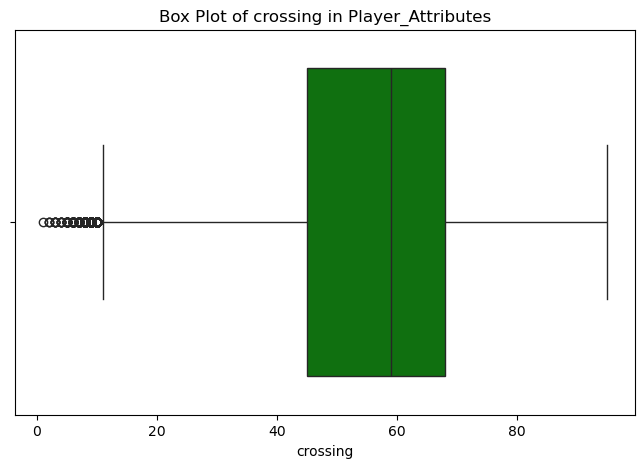

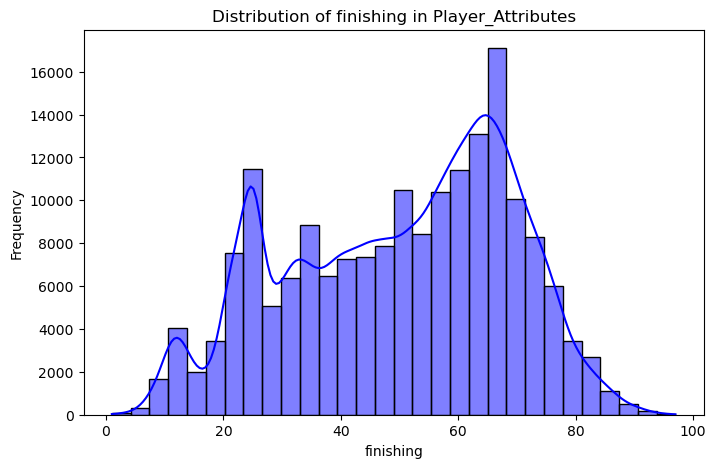

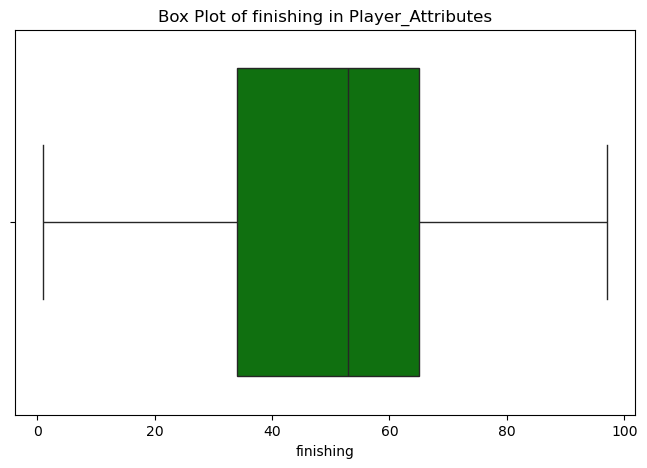

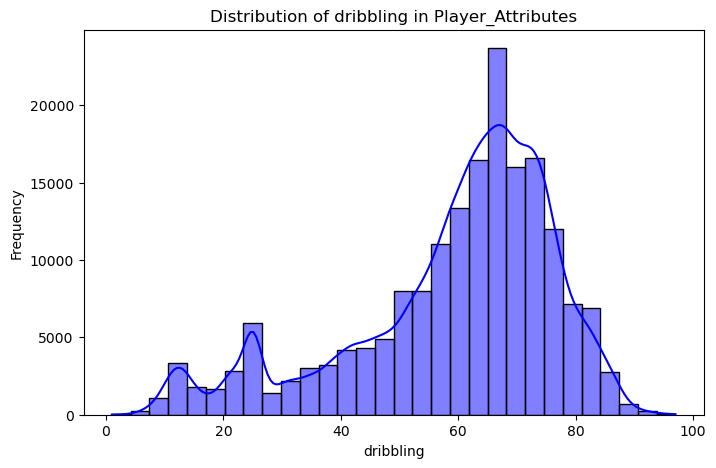

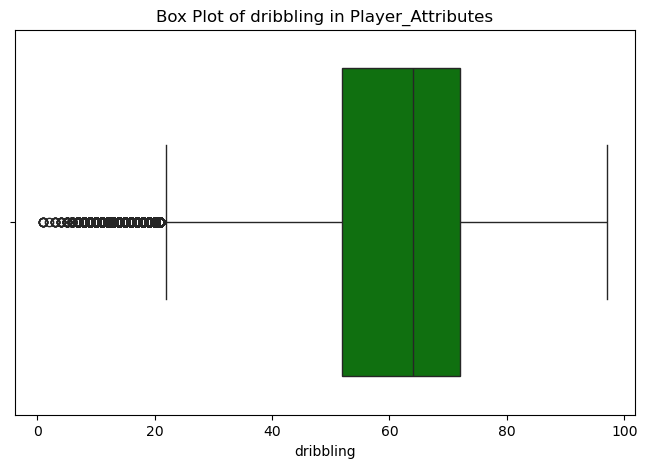


Visualizing Table: Player


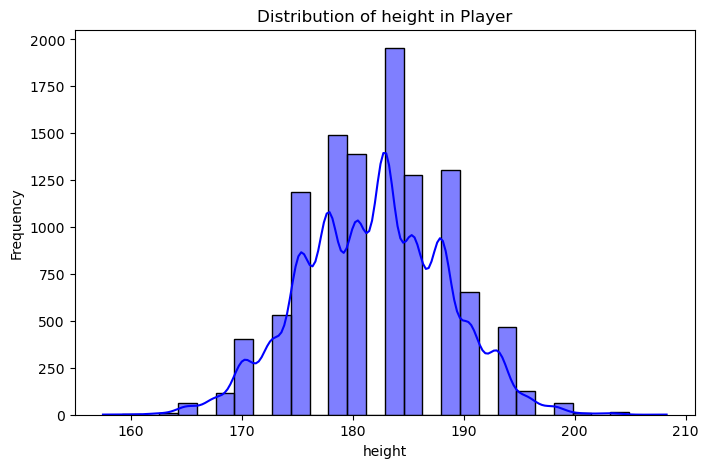

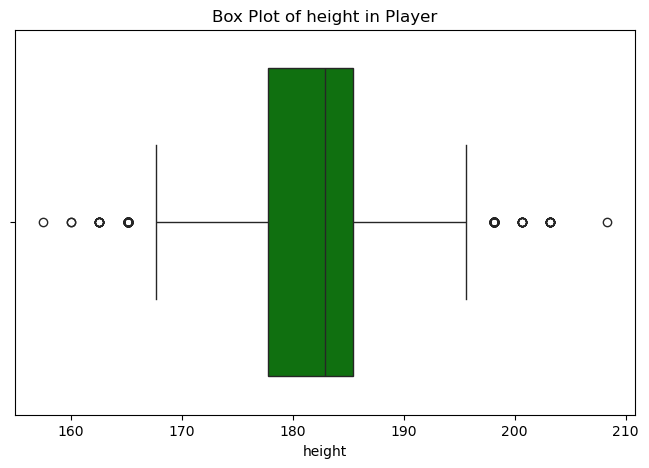

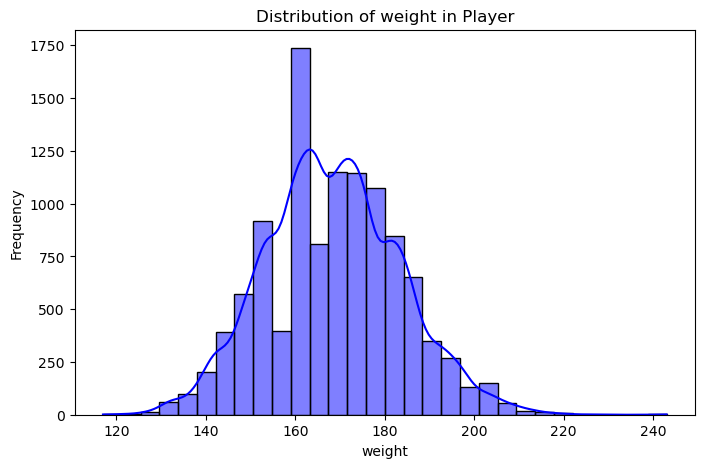

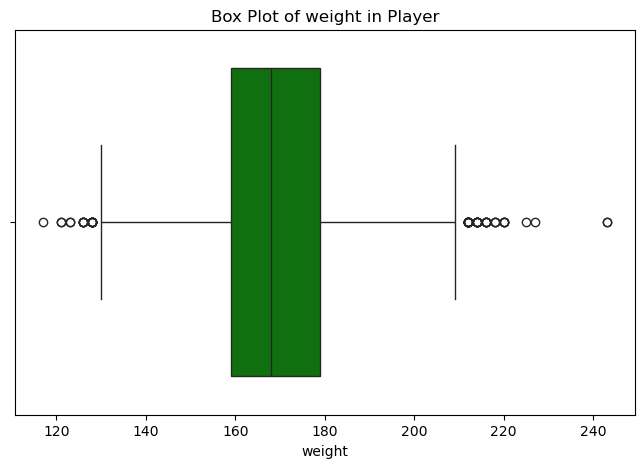


Visualizing Table: Team_Attributes


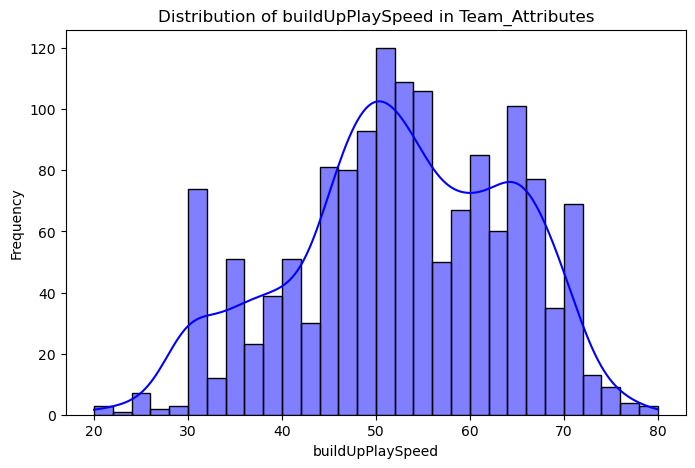

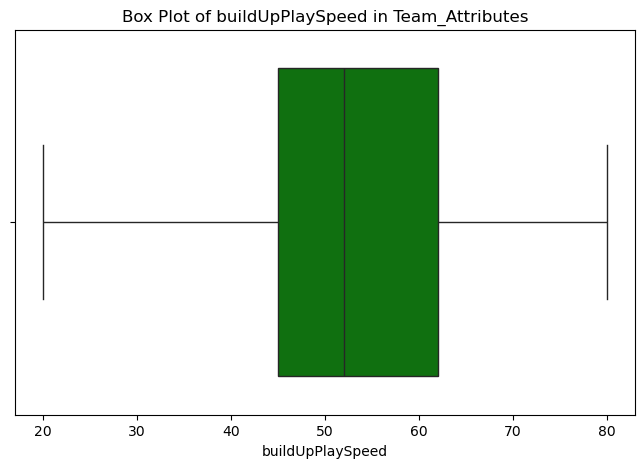

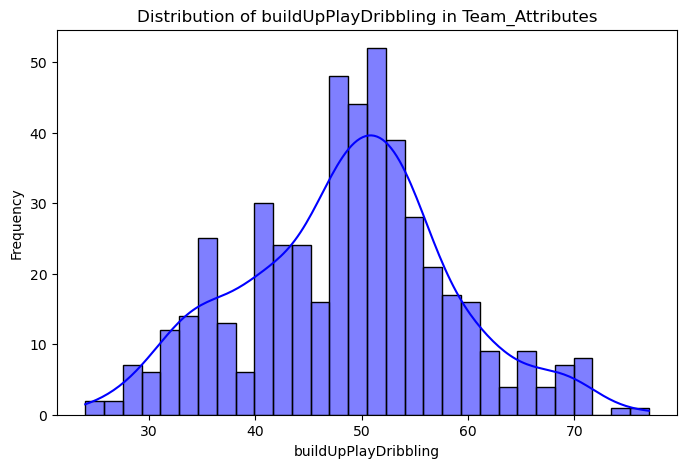

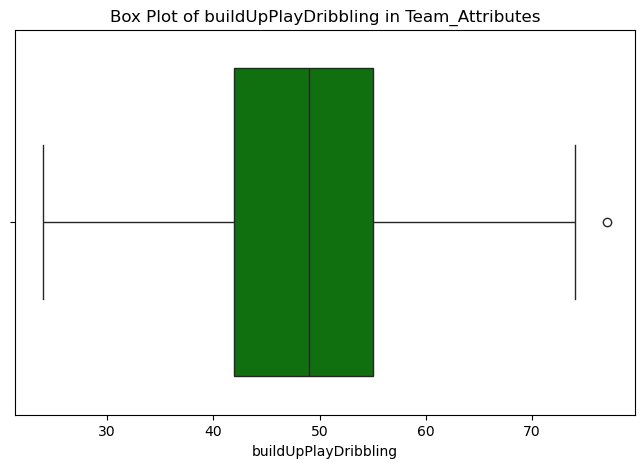

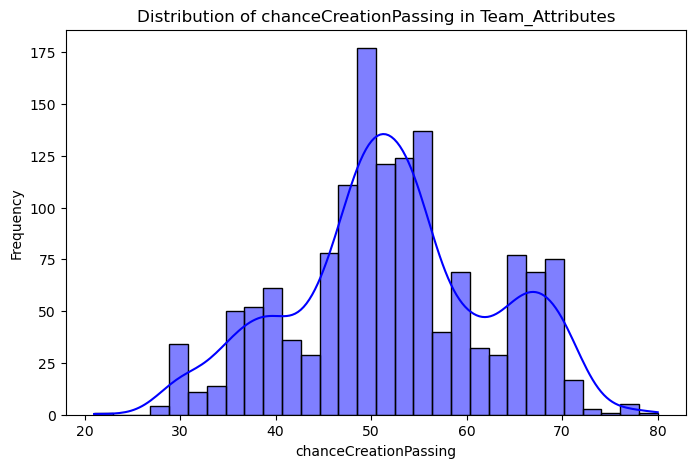

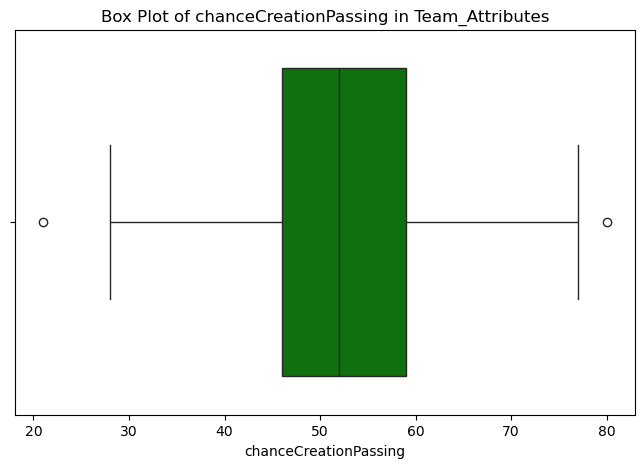

In [17]:
# 6.	Data Distribution
# ▪	Question: How are the features distributed?
# ▪	Use visualizations like histograms or box plots to show the distribution of key features.

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('database.sqlite')

# Define tables and key features for visualization
features_to_plot = {
    "Player_Attributes": [
        "overall_rating", "potential", "crossing", "finishing", "dribbling"
    ],
    "Player": ["height", "weight"],
    "Team_Attributes": [
        "buildUpPlaySpeed", "buildUpPlayDribbling", "chanceCreationPassing"
    ]
}

# Loop through tables and features
for table, features in features_to_plot.items():
    # Load table into a DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)

    print(f"\nVisualizing Table: {table}")

    # Plot histograms for each feature
    for feature in features:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[feature].dropna(), kde=True, bins=30, color="blue")
        plt.title(f"Distribution of {feature} in {table}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()

        # Box plot
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[feature].dropna(), color="green")
        plt.title(f"Box Plot of {feature} in {table}")
        plt.xlabel(feature)
        plt.show()

conn.close()




Correlation Matrix for Table: Player_Attributes
id                   -0.002875
player_fifa_api_id   -0.274089
player_api_id        -0.322389
overall_rating        1.000000
potential             0.766757
crossing              0.357699
finishing             0.329298
heading_accuracy      0.314099
short_passing         0.458361
volleys               0.361470
dribbling             0.354324
curve                 0.357772
free_kick_accuracy    0.349592
long_passing          0.435018
ball_control          0.444257
acceleration          0.245655
sprint_speed          0.254841
agility               0.239896
reactions             0.769246
balance               0.160364
shot_power            0.427996
jumping               0.259023
stamina               0.327456
strength              0.318661
long_shots            0.392382
aggression            0.323934
interceptions         0.250370
positioning           0.370019
vision                0.431137
penalties             0.393189
marking              

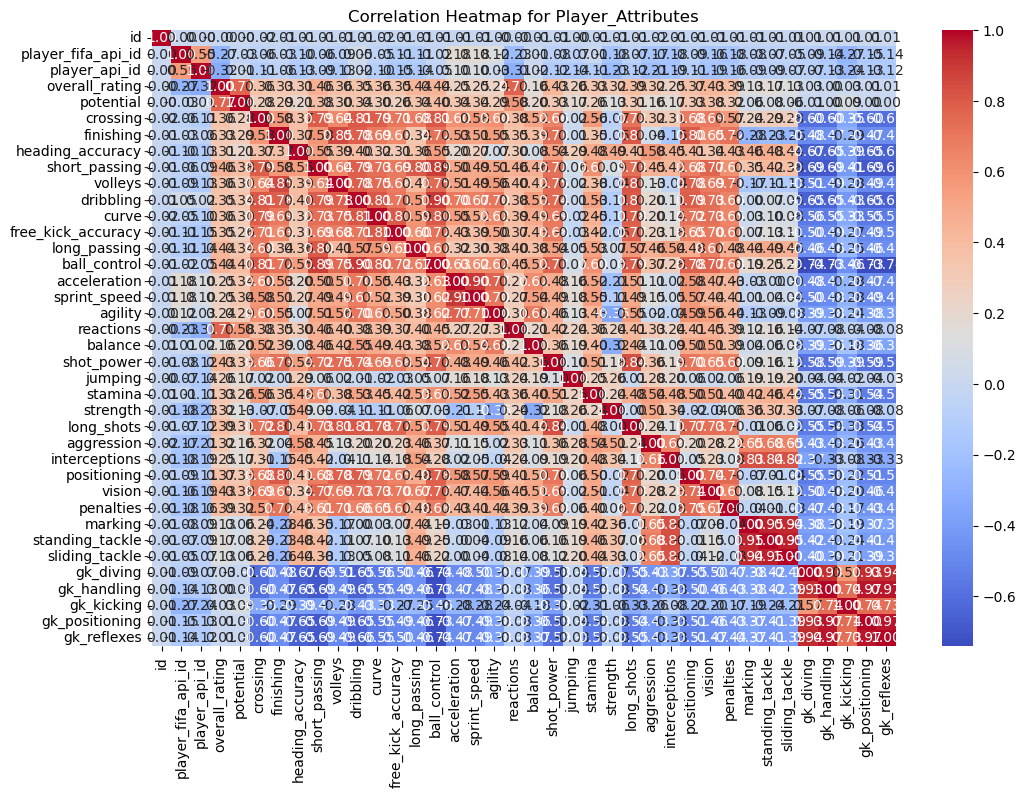

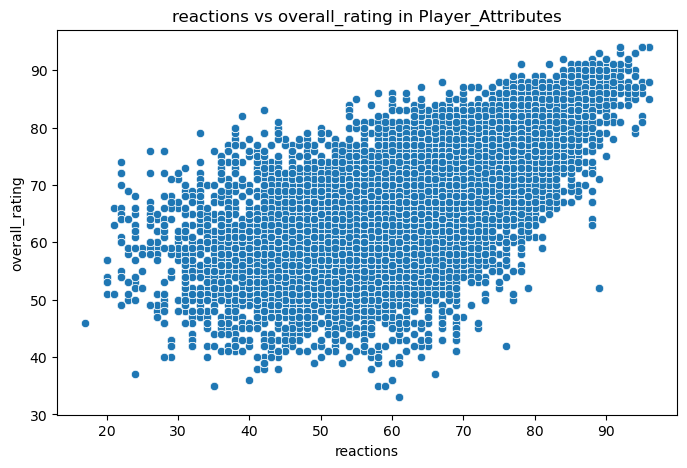

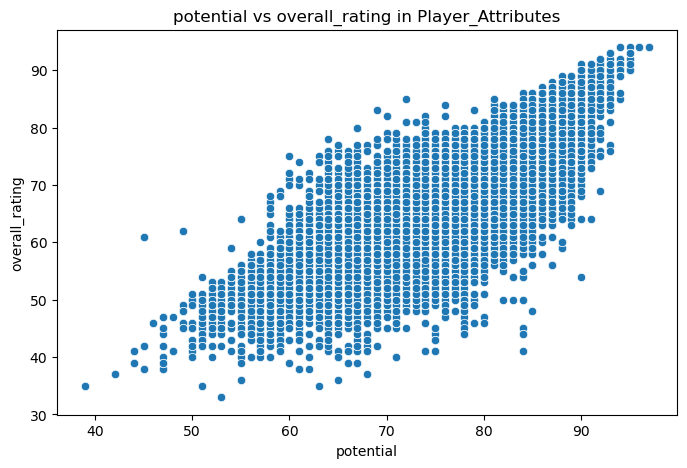

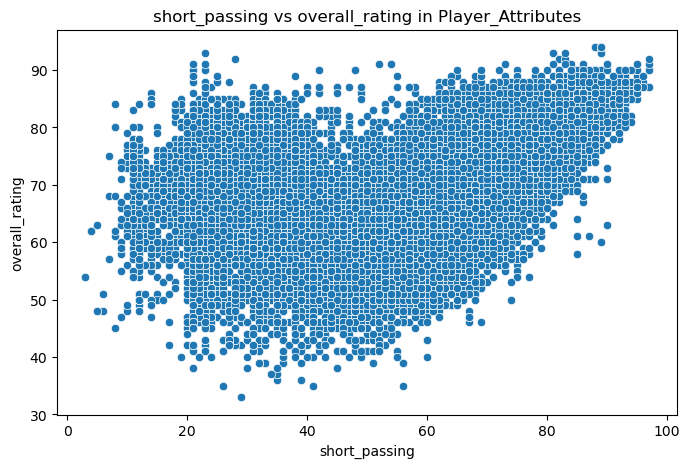

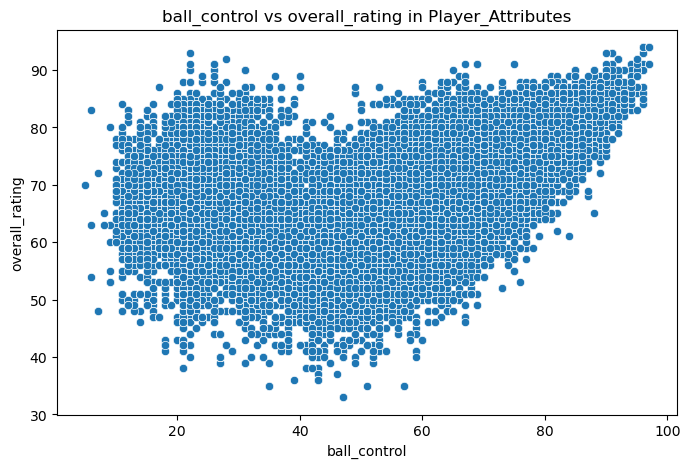

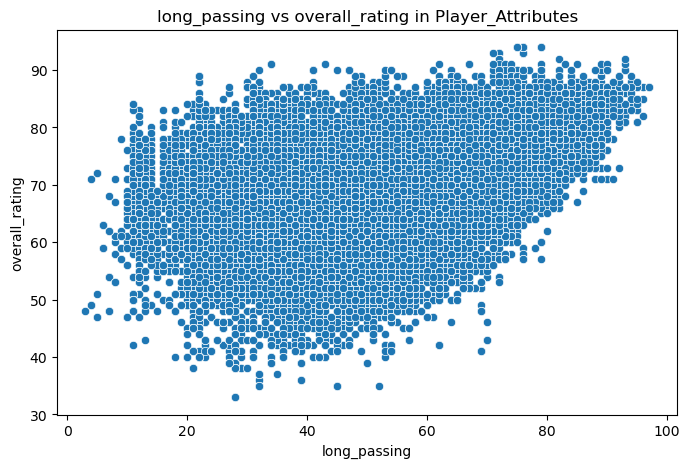


Correlation Matrix for Table: Match
id                  0.008577
country_id          0.008059
league_id           0.008059
stage               0.015150
match_api_id        0.004034
home_team_api_id   -0.015857
away_team_api_id    0.006876
home_team_goal      1.000000
away_team_goal     -0.064099
home_player_X1      0.002187
home_player_X2      0.006661
home_player_X3     -0.005294
home_player_X4     -0.006595
home_player_X5      0.013719
home_player_X6     -0.005582
home_player_X7      0.027908
home_player_X8      0.018727
home_player_X9     -0.035097
home_player_X10    -0.028746
home_player_X11     0.049667
away_player_X1     -0.006534
away_player_X2     -0.017707
away_player_X3     -0.013766
away_player_X4     -0.015803
away_player_X5      0.007333
away_player_X6      0.020661
away_player_X7     -0.004651
away_player_X8     -0.016254
away_player_X9     -0.000660
away_player_X10     0.015287
away_player_X11    -0.010714
home_player_Y1      0.001250
home_player_Y2      0.003109
home_p

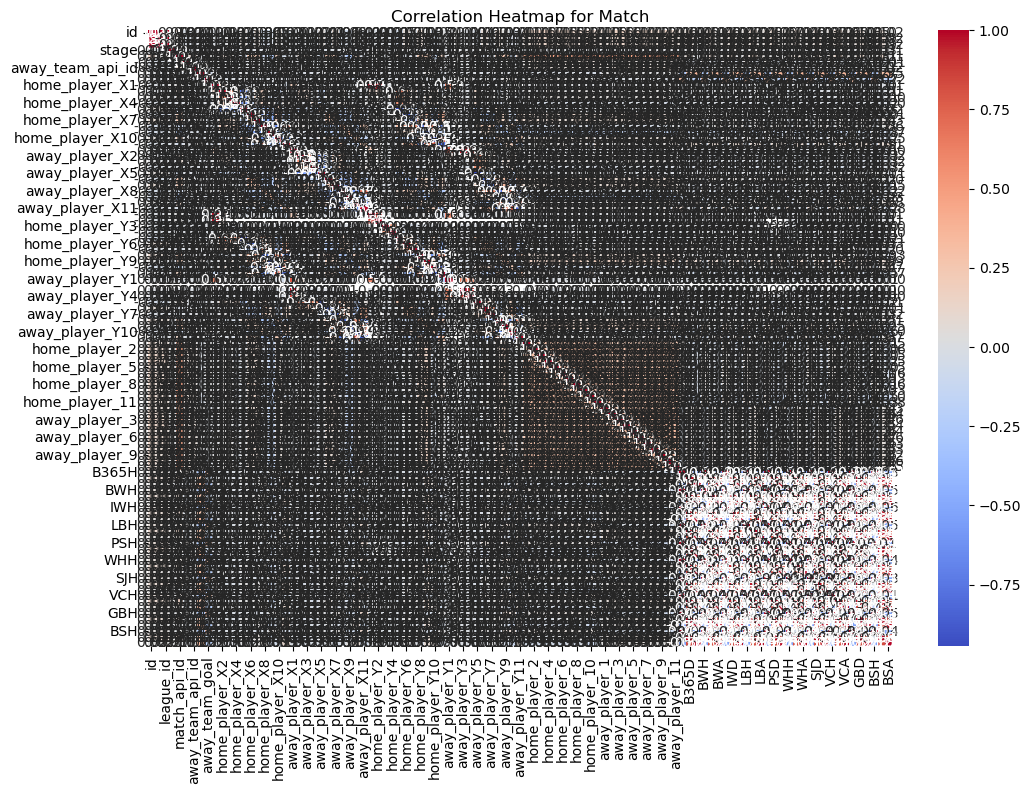

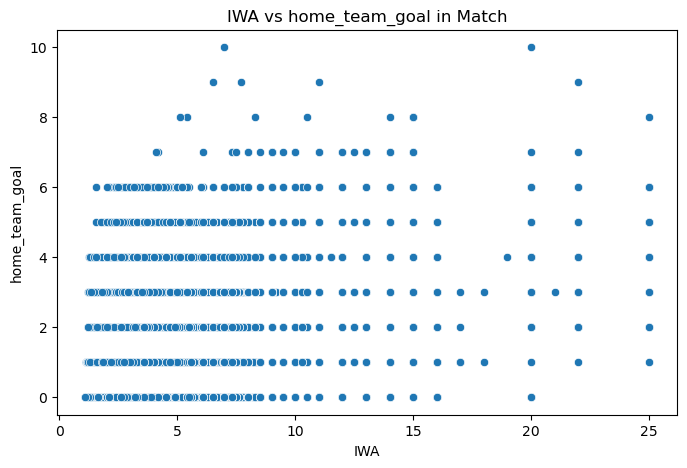

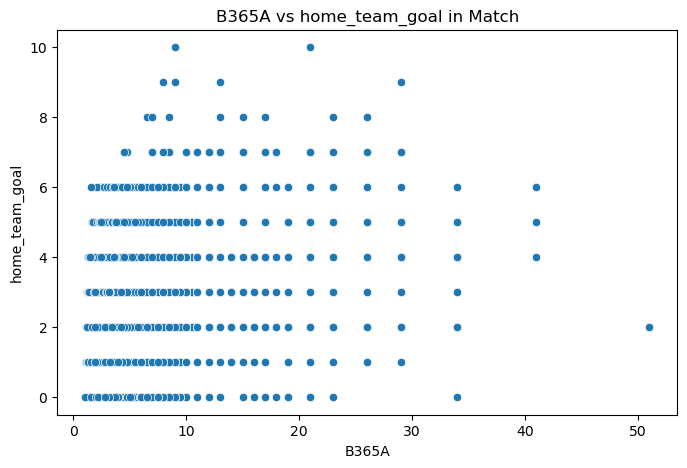

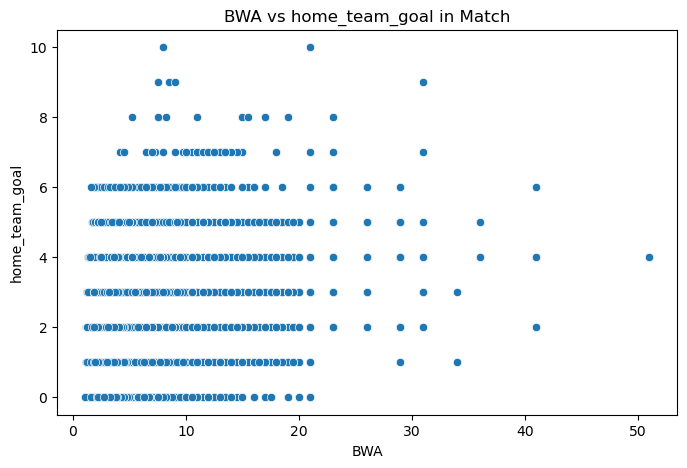

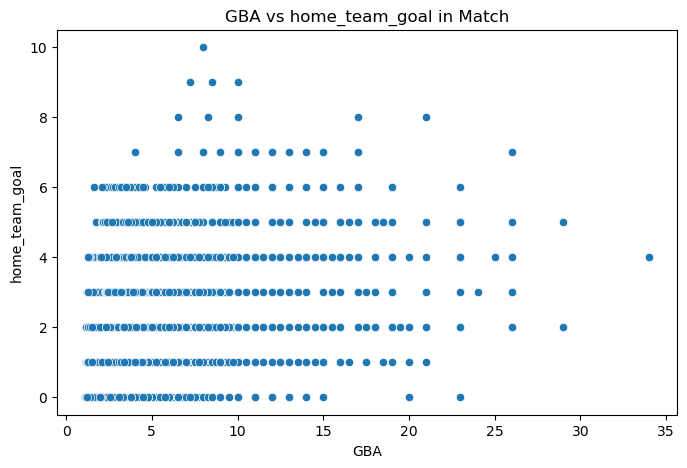

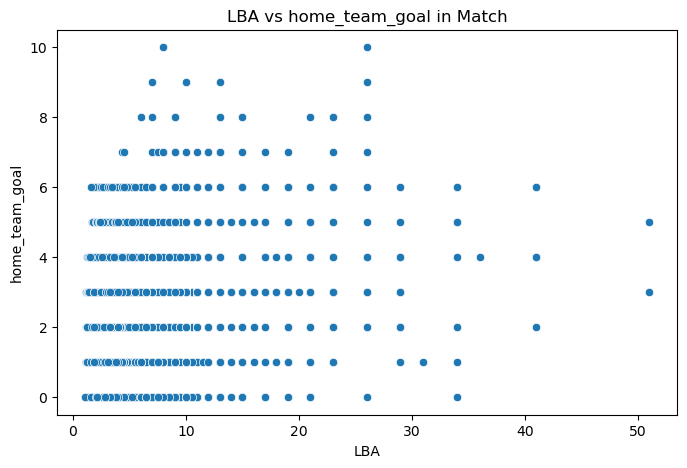

In [20]:
# 7.	Correlation Analysis o 	Question: What is the relationship between different features and the target variable?
# ▪	Calculate correlation coefficients and visualize relationships using scatter plots or heatmaps.

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# Connect to the SQLite database
conn = sqlite3.connect('database.sqlite')

# Define correlation analysis for Player_Attributes and Match tables
tables_to_analyze = {
    "Player_Attributes": "overall_rating",
    "Match": "home_team_goal"
}

for table, target in tables_to_analyze.items():
    # Load table into a DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)

    # Select numerical columns
    numerical_df = df.select_dtypes(include=["number"])

    # Calculate correlations
    correlations = numerical_df.corr()
    print(f"\nCorrelation Matrix for Table: {table}")
    print(correlations[target])

    # Heatmap for correlations
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(f"Correlation Heatmap for {table}")
    plt.show()

    # Scatter plots for top correlated features
    top_features = correlations[target].abs().sort_values(ascending=False).index[1:6]  # Top 5 features
    for feature in top_features:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[feature], y=df[target])
        plt.title(f"{feature} vs {target} in {table}")
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.show()

conn.close()



Outlier Detection for Table: Player_Attributes
overall_rating: 2383 outliers detected


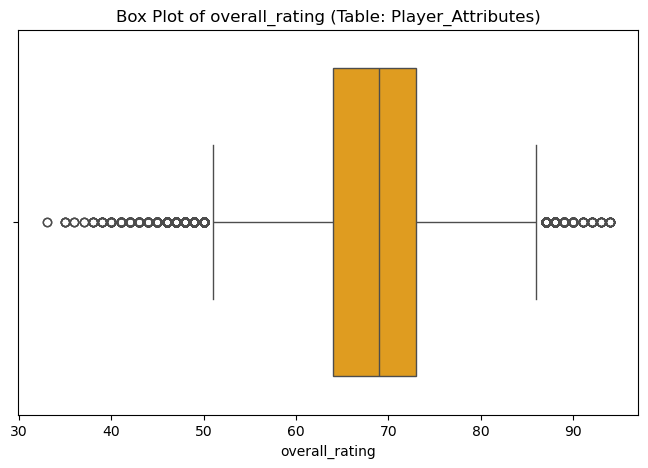

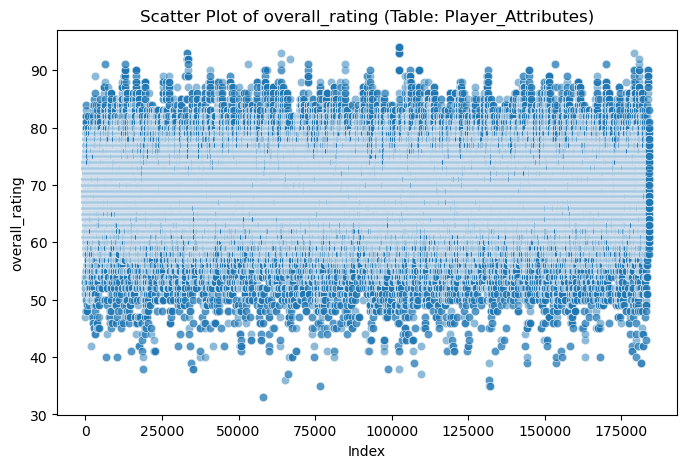

potential: 850 outliers detected


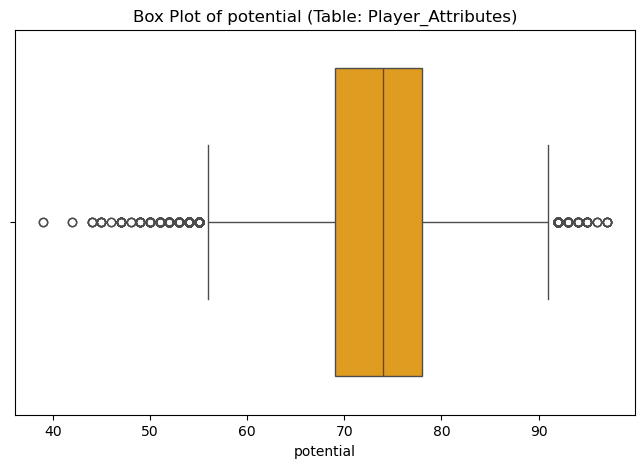

reactions: 3699 outliers detected


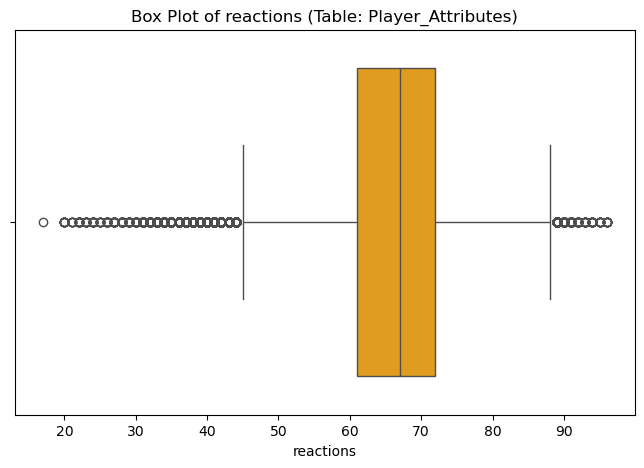


Outlier Detection for Table: Match
home_team_goal: 2056 outliers detected


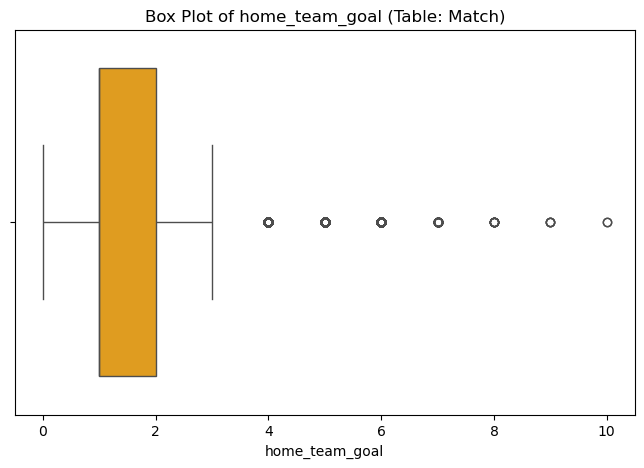

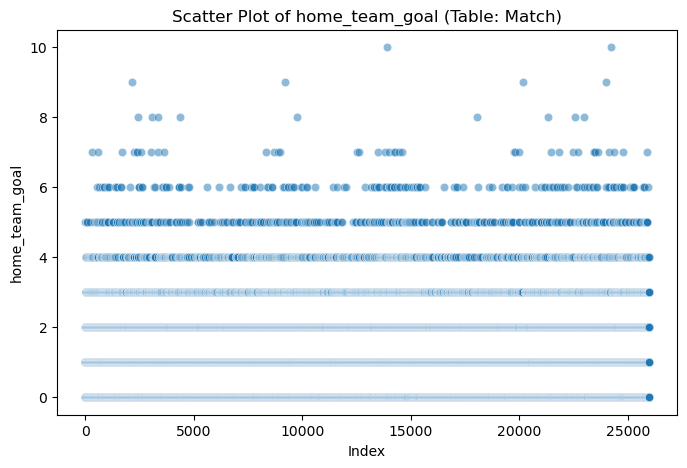

away_team_goal: 79 outliers detected


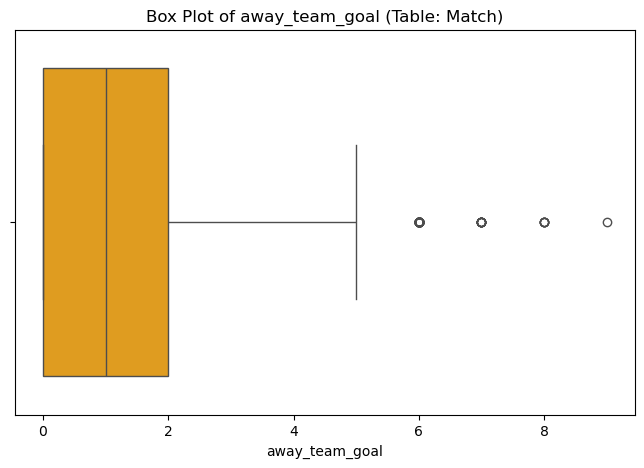


Outlier Detection for Table: Team_Attributes
buildUpPlaySpeed: 0 outliers detected


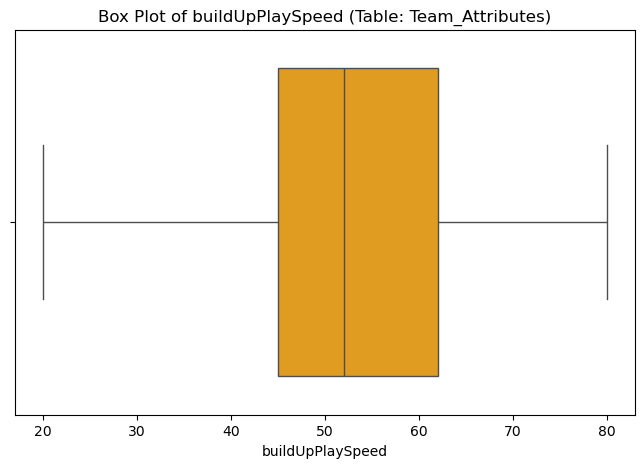

chanceCreationPassing: 2 outliers detected


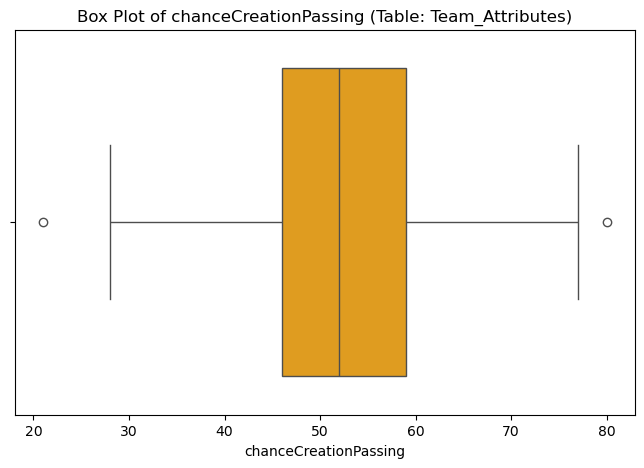

In [21]:
# 8.	Outlier Detection o 	Question: Are there any outliers or anomalies in the data?
# ▪	Identify outliers using statistical methods or visual inspection and discuss their potential impact

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the function for IQR-based outlier detection
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect and visualize outliers for key features
conn = sqlite3.connect('database.sqlite')
tables_to_check = {"Player_Attributes": ["overall_rating", "potential", "reactions"],
                   "Match": ["home_team_goal", "away_team_goal"],
                   "Team_Attributes": ["buildUpPlaySpeed", "chanceCreationPassing"]}

for table, features in tables_to_check.items():
    # Load table into DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)

    print(f"\nOutlier Detection for Table: {table}")

    for feature in features:
        # Detect outliers
        outliers = detect_outliers_iqr(df, feature)
        print(f"{feature}: {len(outliers)} outliers detected")

        # Box plot
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[feature], color="orange")
        plt.title(f"Box Plot of {feature} (Table: {table})")
        plt.xlabel(feature)
        plt.show()

        # Scatter plot (if applicable)
        if feature in ["overall_rating", "home_team_goal"]:  # Add scatter plots for target-related features
            plt.figure(figsize=(8, 5))
            sns.scatterplot(x=np.arange(len(df[feature])), y=df[feature], alpha=0.5)
            plt.title(f"Scatter Plot of {feature} (Table: {table})")
            plt.xlabel("Index")
            plt.ylabel(feature)
            plt.show()

conn.close()


In [22]:
# in this block we will deal with the missing values and duplicates.

import sqlite3
import pandas as pd

# Step 1: Connect to the database and load the tables into DataFrames
conn = sqlite3.connect('database.sqlite')

# Load the required tables into DataFrames
df_player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
df_match = pd.read_sql_query("SELECT * FROM Match", conn)
df_team_attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)

conn.close()  # Close the database connection

# Step 2: Handle missing values for Player_Attributes
print("Handling missing values for Player_Attributes...")
# Impute critical features with the median
df_player_attributes['overall_rating'].fillna(df_player_attributes['overall_rating'].median(), inplace=True)
df_player_attributes['potential'].fillna(df_player_attributes['potential'].median(), inplace=True)

# Impute secondary features with the mean
secondary_features = [
    'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling',
    'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
    'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength',
    'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking',
    'standing_tackle', 'sliding_tackle'
]
for feature in secondary_features:
    df_player_attributes[feature].fillna(df_player_attributes[feature].mean(), inplace=True)

# For goalkeeper-specific features, use mean imputation
goalkeeper_features = [
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'
]
for feature in goalkeeper_features:
    df_player_attributes[feature].fillna(df_player_attributes[feature].mean(), inplace=True)

# Step 3: Handle missing values for Match
print("Handling missing values for Match...")
# Drop irrelevant or excessively missing betting odds columns
columns_to_drop = ['B365H', 'B365A', 'BWH', 'BWA', 'IWH', 'IWA']
df_match.drop(columns=columns_to_drop, inplace=True)

# Impute positional data with the mode
positional_columns = ['home_player_X1', 'away_player_X1', 'home_player_Y1', 'away_player_Y1']
for col in positional_columns:
    df_match[col].fillna(df_match[col].mode()[0], inplace=True)

# Impute other numeric columns with mean if necessary
numeric_columns = df_match.select_dtypes(include=['number']).columns
for col in numeric_columns:
    df_match[col].fillna(df_match[col].mean(), inplace=True)

# Step 4: Handle missing values for Team_Attributes
print("Handling missing values for Team_Attributes...")
# Impute critical team features with mean
team_features = [
    'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing',
    'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',
    'defencePressure', 'defenceAggression', 'defenceTeamWidth'
]
for feature in team_features:
    df_team_attributes[feature].fillna(df_team_attributes[feature].mean(), inplace=True)

# Step 5: Save the processed DataFrames to CSVs (optional)
df_player_attributes.to_csv("processed_Player_Attributes.csv", index=False)
df_match.to_csv("processed_Match.csv", index=False)
df_team_attributes.to_csv("processed_Team_Attributes.csv", index=False)

print("Data preprocessing complete! Missing values handled and saved to CSV files.")


Handling missing values for Player_Attributes...
Handling missing values for Match...
Handling missing values for Team_Attributes...


C:\Users\ink\AppData\Local\Temp\ipykernel_18448\4038889332.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_player_attributes['overall_rating'].fillna(df_player_attributes['overall_rating'].median(), inplace=True)
C:\Users\ink\AppData\Local\Temp\ipykernel_18448\4038889332.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

Data preprocessing complete! Missing values handled and saved to CSV files.


In [29]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Connect to the database
conn = sqlite3.connect('database.sqlite')

# Step 2: Load the Player_Attributes table
print("Loading Player_Attributes data from the database...")
query = "SELECT * FROM Player_Attributes"
df_player_attributes = pd.read_sql_query(query, conn)

# Step 3: Handle missing values dynamically
print("Handling missing values for Player_Attributes...")
# Replace missing values for numerical attributes with the median
df_player_attributes['overall_rating'] = df_player_attributes['overall_rating'].fillna(df_player_attributes['overall_rating'].median())
df_player_attributes['potential'] = df_player_attributes['potential'].fillna(df_player_attributes['potential'].median())

# Replace missing values for categorical attributes with a placeholder 'unknown'
categorical_columns = ['attacking_work_rate', 'defensive_work_rate', 'preferred_foot']
for col in categorical_columns:
    df_player_attributes[col] = df_player_attributes[col].fillna('unknown')

# Step 4: Define the order for ordinal variables
ordinal_map = {
    'attacking_work_rate': ['unknown', 'low', 'medium', 'high'],
    'defensive_work_rate': ['unknown', 'low', 'medium', 'high']
}

# Step 5: Function to label encode ordinal features
def label_encode(df, order_map):
    for col, order in order_map.items():
        le = LabelEncoder()
        le.fit(order)  # Fit the LabelEncoder with the extended order
        # Replace any unexpected values with 'unknown' before transforming
        df[col] = df[col].apply(lambda x: x if x in order else 'unknown')
        df[col] = le.transform(df[col])  # Transform the column
    return df

# Apply label encoding for ordinal variables
print("Encoding Player_Attributes categorical variables...")
df_player_attributes = label_encode(df_player_attributes, ordinal_map)

# Step 6: One-hot encode non-ordinal variables (e.g., 'preferred_foot')
df_player_attributes = pd.get_dummies(df_player_attributes, columns=['preferred_foot'], drop_first=True)

# Step 7: Save the processed DataFrame
df_player_attributes.to_csv("encoded_Player_Attributes.csv", index=False)
print("Player_Attributes encoding complete and saved as 'encoded_Player_Attributes.csv'.")

# Close the database connection
conn.close()


Loading Player_Attributes data from the database...
Handling missing values for Player_Attributes...
Encoding Player_Attributes categorical variables...
Player_Attributes encoding complete and saved as 'encoded_Player_Attributes.csv'.


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import numpy as np

# Load preprocessed data
df = pd.read_csv("encoded_Player_Attributes.csv")

# Check for columns
print("Columns in the dataset:", df.columns.tolist())

# Select features and target variable
target_column = "home_team_goal"
if target_column in df.columns:
    X = df.drop(columns=[target_column])  # Drop target variable
    y = df[target_column]
else:
    raise ValueError(f"Target column '{target_column}' not found in dataset!")

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate models using RMSE
results = []
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation using RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({"Model": name, "RMSE": rmse})
    print(f"{name} - RMSE: {rmse:.2f}")

# Display results
results_df = pd.DataFrame(results)
print("\nRegression Model Performance:")
print(results_df)

# Save the results
results_df.to_csv("regression_model_results.csv", index=False)
print("Regression model results saved to 'regression_model_results.csv'.")


Loading data from the database...
Loaded data preview:
Empty DataFrame
Columns: [id, player_fifa_api_id, player_api_id, date, overall_rating, potential, preferred_foot, attacking_work_rate, defensive_work_rate, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes, home_team_goal]
Index: []
Total rows loaded: 0


ValueError: The SQL query returned no data. Check the database and query conditions.

In [33]:
import sqlite3

# Connect to the database
conn = sqlite3.connect("database.sqlite")

# Load the necessary columns from the Match table
query = """
SELECT
    ma.home_team_goal,
    pa.*
FROM Player_Attributes pa
JOIN Match ma
ON pa.player_api_id = ma.home_team_api_id
"""
df = pd.read_sql_query(query, conn)

# Save the enriched dataset
df.to_csv("encoded_Player_Attributes_with_target.csv", index=False)
print("Dataset with target variable saved.")


Dataset with target variable saved.


In [6]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

try:
    # Step 1: Load Player_Attributes data
    print("Loading Player_Attributes data from the database...")
    conn = sqlite3.connect('database.sqlite')

    query_player_attributes = "SELECT * FROM Player_Attributes"
    df_player_attributes = pd.read_sql_query(query_player_attributes, conn)

    if df_player_attributes.empty:
        print("\nNo data retrieved from Player_Attributes. Check the table content.")
        raise ValueError("Player_Attributes table is empty.")

    print("\nPlayer_Attributes data loaded successfully!")
    print(df_player_attributes.head())

    # Step 2: Handle missing values in Player_Attributes
    print("\nHandling missing values in Player_Attributes...")
    df_player_attributes.fillna({
        'overall_rating': df_player_attributes['overall_rating'].median(),
        'potential': df_player_attributes['potential'].median(),
        'preferred_foot': 'unknown',
        'attacking_work_rate': 'unknown',
        'defensive_work_rate': 'unknown'
    }, inplace=True)

    # Ensure all categorical columns have consistent data types
    categorical_columns = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
    for col in categorical_columns:
        df_player_attributes[col] = df_player_attributes[col].astype(str)

    # Step 3: Encode categorical variables
    print("\nEncoding categorical variables in Player_Attributes...")
    encoder = LabelEncoder()

    # Handle attacking_work_rate and defensive_work_rate
    for col in ['attacking_work_rate', 'defensive_work_rate']:
        known_classes = ['low', 'medium', 'high', 'unknown']  # Define all possible values
        df_player_attributes[col] = df_player_attributes[col].apply(
            lambda x: x if x in known_classes else 'unknown'
        )
        encoder.fit(known_classes)
        df_player_attributes[col] = encoder.transform(df_player_attributes[col])

    # One-hot encode preferred_foot
    df_player_attributes = pd.get_dummies(df_player_attributes, columns=['preferred_foot'], drop_first=True)

    print("\nProcessed Player_Attributes data preview:")
    print(df_player_attributes.head())

    # Save processed data to a CSV for further use
    df_player_attributes.to_csv("processed_player_attributes.csv", index=False)
    print("\nProcessed Player_Attributes data saved to 'processed_player_attributes.csv'.")

    # If needed, continue with further steps like feature scaling and modeling

except Exception as e:
    print("Error:", e)


Loading Player_Attributes data from the database...

Player_Attributes data loaded successfully!
   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.

Loading preprocessed data...
Data loaded successfully!

Selecting features and target variable...

Splitting data into training and testing sets...
Training set size: 147182 samples
Testing set size: 36796 samples

Scaling features...
Feature scaling completed.

Training the regression model...
Model training completed.

Evaluating the model...
Root Mean Squared Error (RMSE): 0.92
R² Score: 0.98

Feature Importance:
reactions                 0.484712
potential                 0.233633
ball_control              0.056762
standing_tackle           0.043020
gk_diving                 0.020590
heading_accuracy          0.018777
gk_positioning            0.014606
positioning               0.010835
crossing                  0.010038
marking                   0.009926
gk_handling               0.009168
shot_power                0.008401
interceptions             0.008117
finishing                 0.008073
strength                  0.008053
dribbling                 0.006745
stamina             

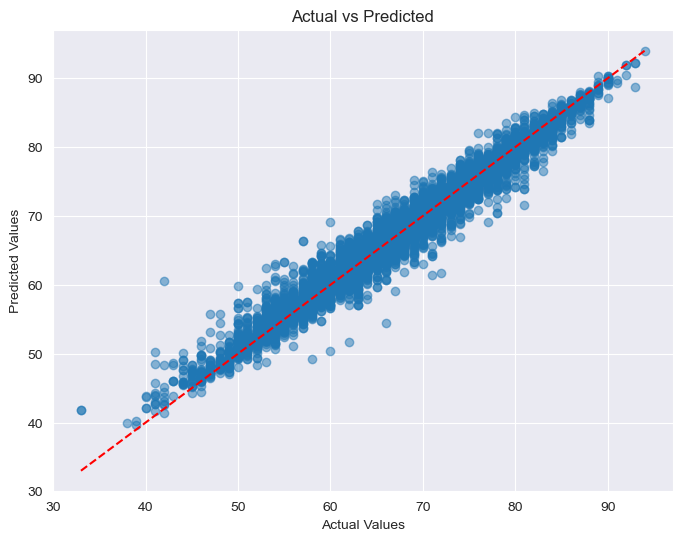

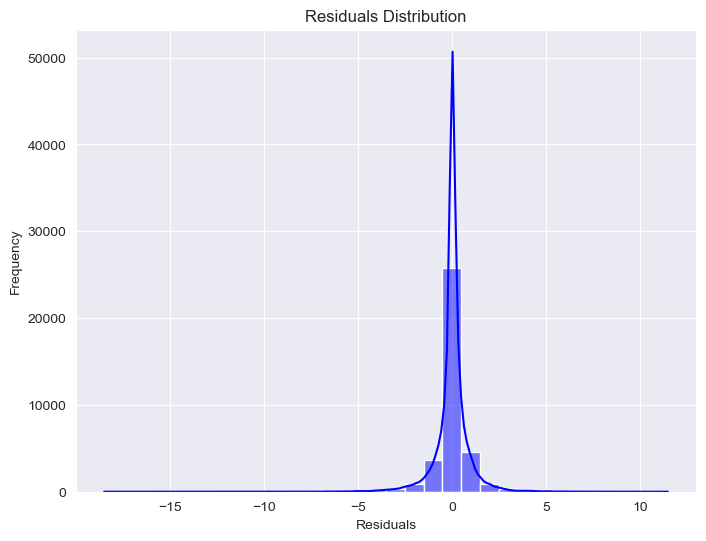

C:\Users\ink\AppData\Local\Temp\ipykernel_6812\243685542.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


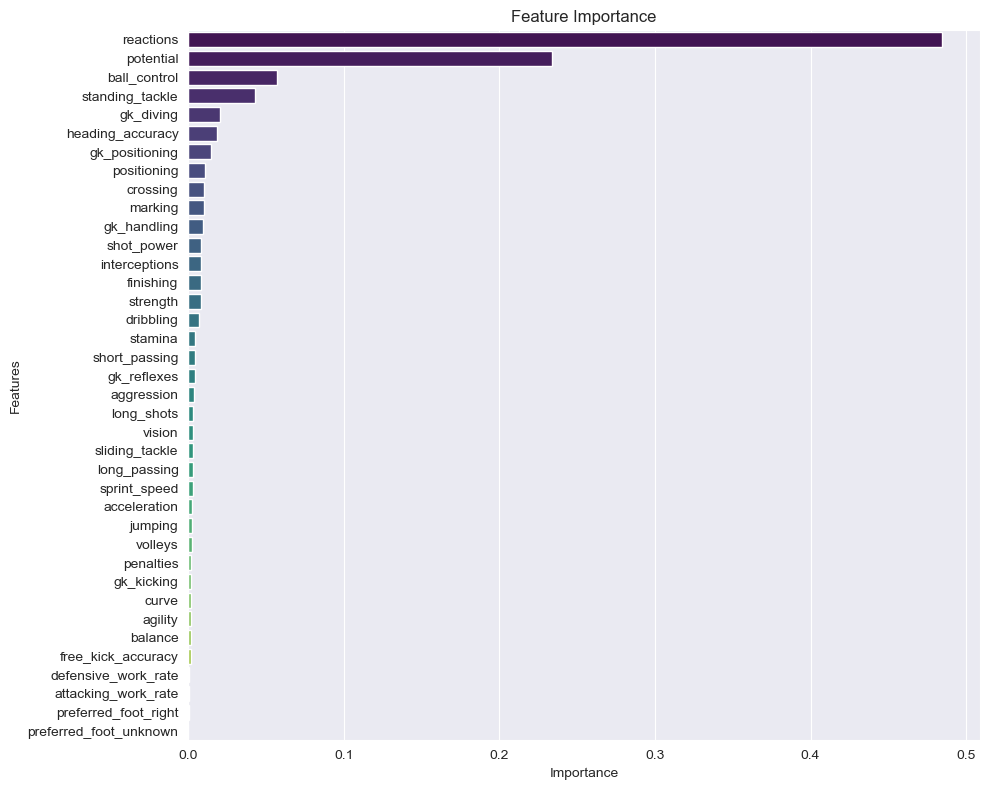

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load preprocessed data
print("Loading preprocessed data...")
data = pd.read_csv('processed_player_attributes.csv')
print("Data loaded successfully!")

# Step 2: Select features and target
print("\nSelecting features and target variable...")
features = [
    'potential', 'attacking_work_rate', 'defensive_work_rate', 'crossing',
    'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling',
    'curve', 'free_kick_accuracy', 'long_passing', 'ball_control',
    'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
    'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
    'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
    'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
    'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
    'preferred_foot_right', 'preferred_foot_unknown'
]
target = 'overall_rating'

X = data[features]
y = data[target]

# Step 3: Split the data
print("\nSplitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

# Step 4: Scale the features
print("\nScaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling completed.")

# Step 5: Train the model
print("\nTraining the regression model...")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
print("Model training completed.")

# Step 6: Evaluate the model
print("\nEvaluating the model...")
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)





Generating visualizations...


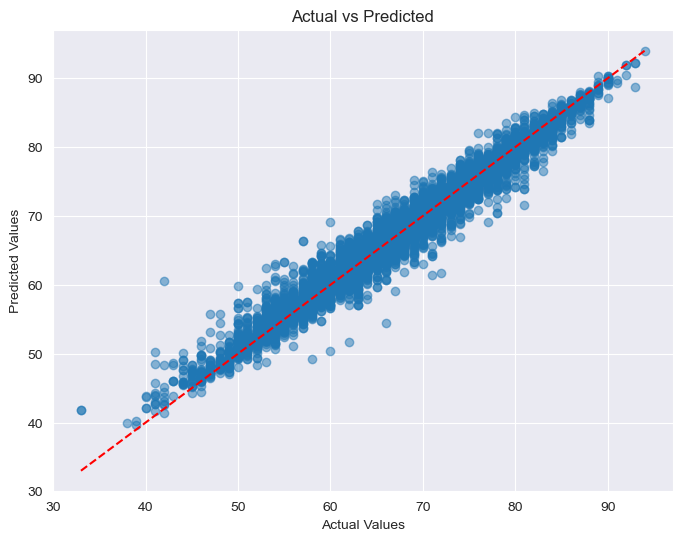

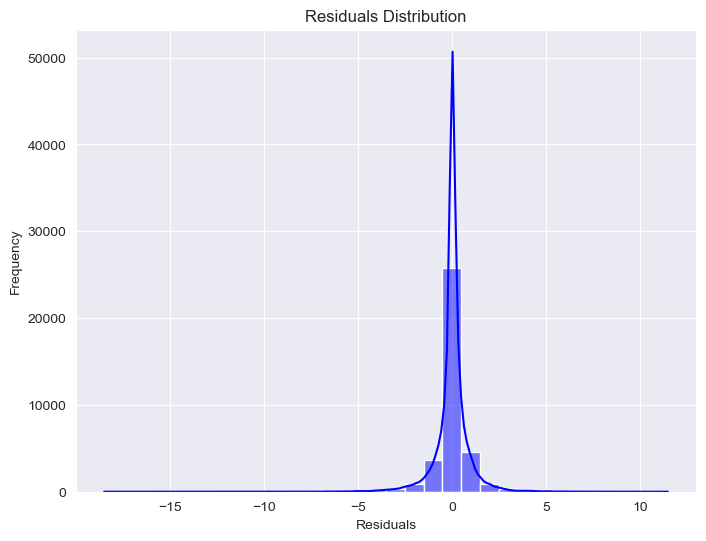

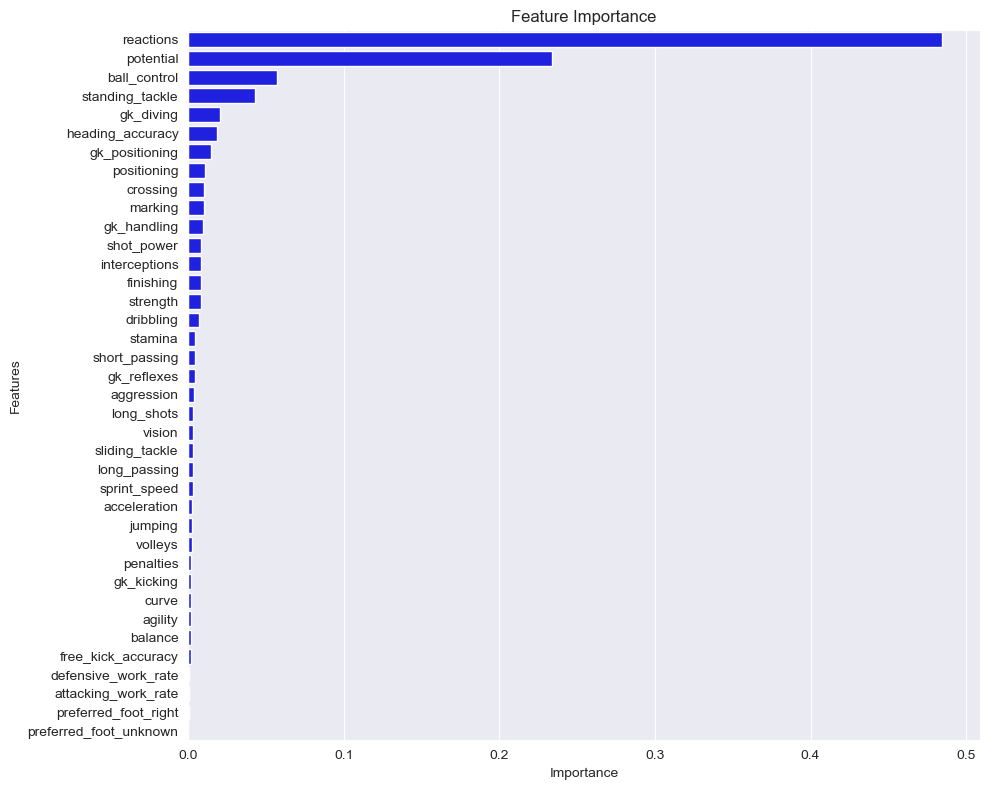

In [11]:
# Visualization
print("\nGenerating visualizations...")

# 1. Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# 2. Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 3. Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance.values, y=feature_importance.index, color="blue")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# Part 4

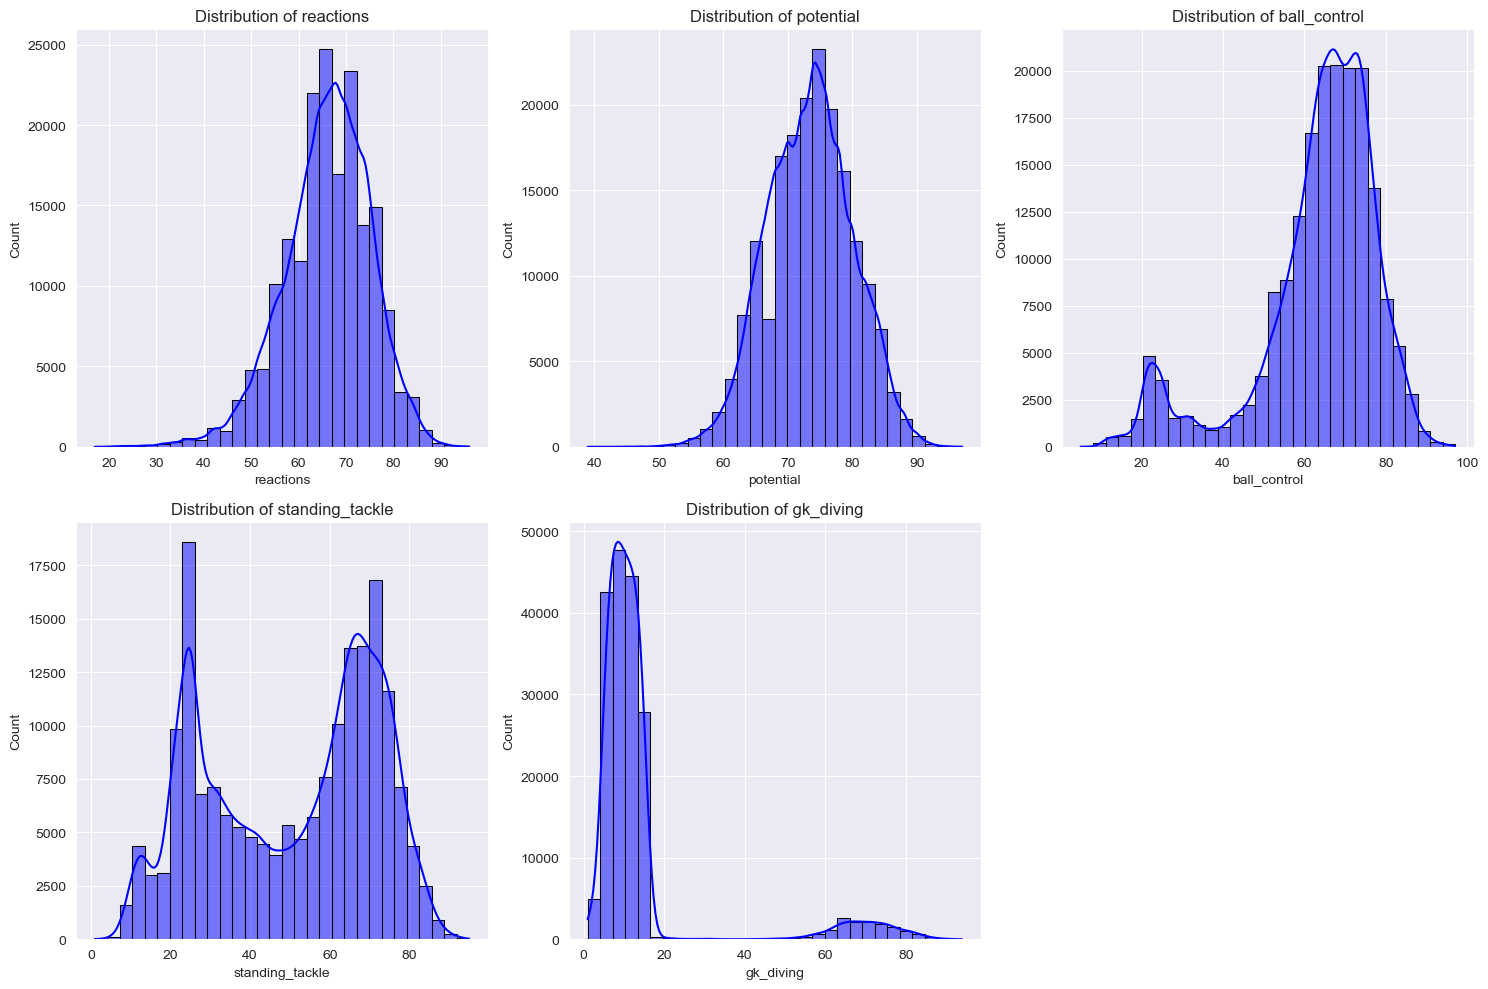

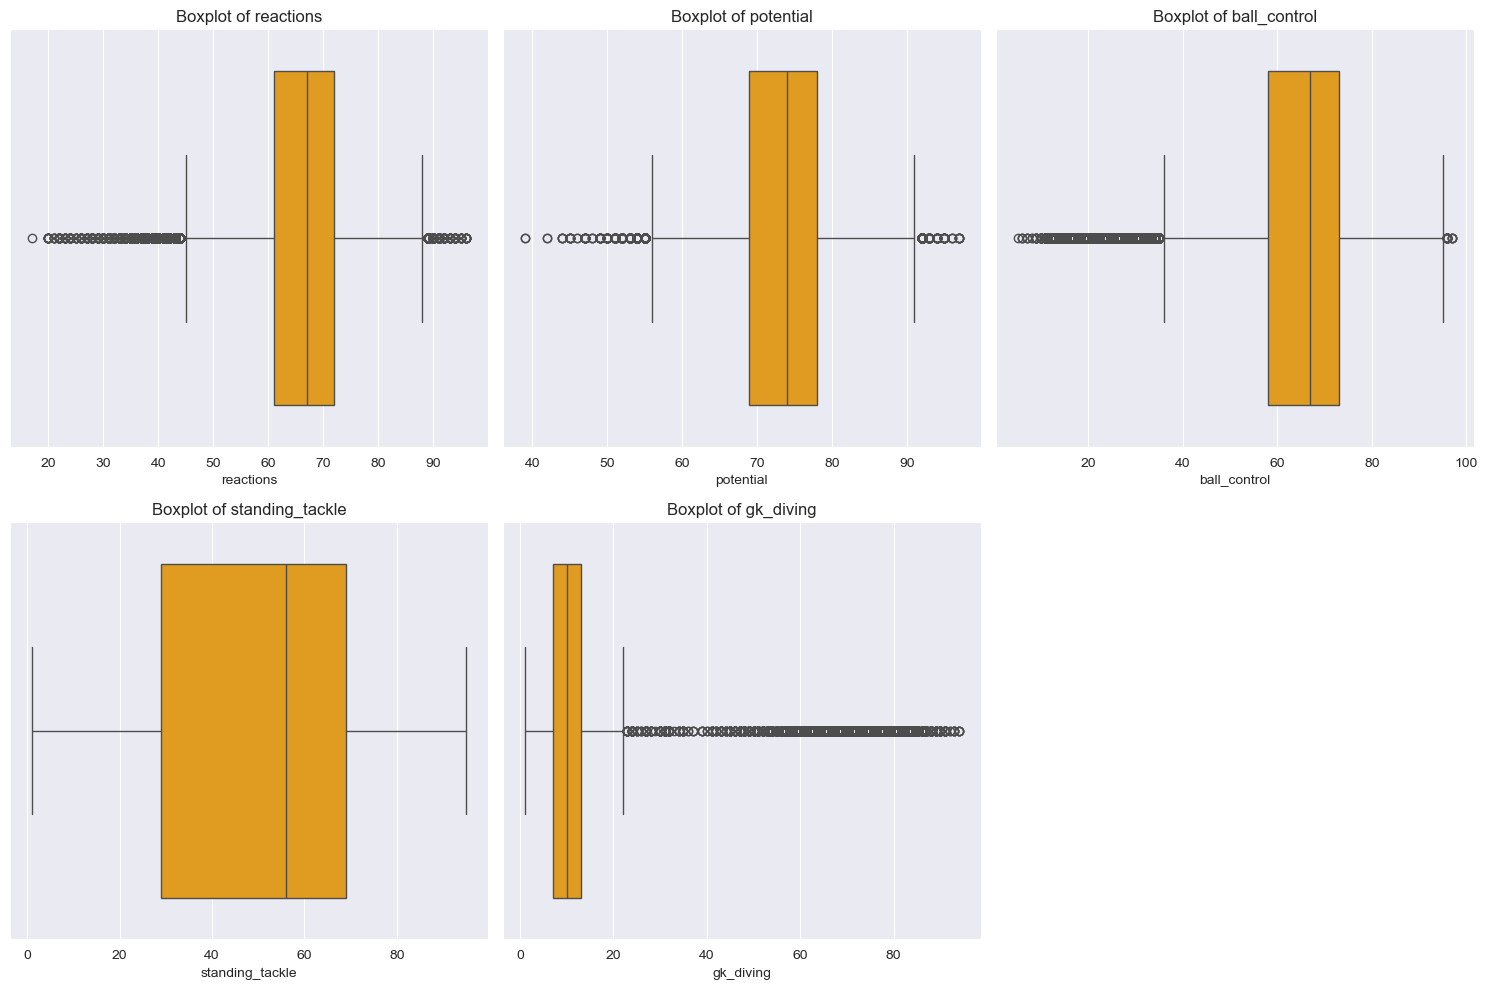

NameError: name 'rf_model' is not defined

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay

# Load preprocessed data
df = pd.read_csv('processed_player_attributes.csv')

# Selected important features
important_features = [
    'reactions', 'potential', 'ball_control', 'standing_tackle', 'gk_diving'
]

# Visualize distributions for important features
plt.figure(figsize=(15, 10))
for i, col in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots for important features
plt.figure(figsize=(15, 10))
for i, col in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Feature importance bar plot
importances = pd.Series(rf_model.feature_importances_, index=features)
important_importances = importances[important_features].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=important_importances, y=important_importances.index, palette='coolwarm')
plt.title('Feature Importance for Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Partial dependence plots for top 3 important features
top_3_features = important_features[:3]  # Select top 3 important features
fig, ax = plt.subplots(figsize=(10, 10))
PartialDependenceDisplay.from_estimator(rf_model, X_test, top_3_features, ax=ax)
plt.suptitle("Partial Dependence Plots of Top Features")
plt.show()
